# Sinarmas APP Instructions

We are given Survey data for more than 6,000 Respondent. We must did :
1. Created predictive modelling using machine learning algorithms
2. Improved prediction model by using some methods, e.g. Ensemble Learning or hyperparametric tuning.
3. Identifying Misrepresentation, not sure but find the worst feature, make a model selection, show the biased, variance, MSE, and do spot checking linear/nonlinear. **Still confusing**
4. Managing the project, **Still confusing**
5. Create a presentation with our result with it's data visualization and **clarifying questions**.

# Data Preparation
Load necessary Python libraries and load the SBU data. Note that the middle column from this dataset, `'DIABETE3'`, will be our target label (it is in string value so must convert into integer dummy value). All other columns are features about each individual in the SBU database.

## Python Module Preparation
We need to analysis the data and also visualized them. Then we do machine learning algorithms. For speed up the process, we need python modules to help us.

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import datetime as dtz
from sklearn.preprocessing import Normalizer,LabelEncoder

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Density
from scipy.stats import gamma

# Machine learning toolkit
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier

# Cross Validation(k-fold)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Make pandas display in scientific format for all continuous computing
pd.options.display.float_format = '{:.0f}'.format

# Set panda option to display row and columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',120)

In [2]:
Compile_date = dtz.datetime.now()
print('The last date we try to compile this code at :',Compile_date)

The last date we try to compile this code at : 2019-10-11 09:14:03.383047


## Data Loading

We will load survey data into memory which named : *SBU_example_Surveydata_2014.csv*

In [3]:
#Determine the character encoding in CSV datatype.
import chardet   
rawdata = open('./DATA/SBU_example_Surveydata_2014.csv','rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print('Your CSV data encode by',charenc)

Your CSV data encode by Windows-1252


In [4]:
print('We input the Data of Test Case in Survey (SBU)')
SBU = pd.read_csv('./DATA/SBU_example_Surveydata_2014.csv', encoding = charenc)
#SBU = pd.read_csv('./DATA/SBU_example_Surveydata_2014.csv', encoding = 'Windows-1252')
print('='*70)

#Shape of SBU Data
print("Number of Survey Diabetes's Column is",SBU.shape[1])
print("Number of Survey Diabetes's Row is",SBU.shape[0])
#Print Column Name
print("Name of Survey Diabetes's Columns are :")
display(SBU.dtypes)

We input the Data of Test Case in Survey (SBU)
Number of Survey Diabetes's Column is 120
Number of Survey Diabetes's Row is 6865
Name of Survey Diabetes's Columns are :


STATE         object
GEOSTR         int64
DENSTR2       object
PRECALL       object
REPNUM         int64
REPDEPTH       int64
FMONTH        object
IDATE          int64
IMONTH        object
IDAY           int64
IYEAR          int64
DISPCODE       int64
SEQNO          int64
PSU            int64
NATTMPTS       int64
NRECSEL        int64
NRECSTR      float64
PVTRESD1      object
COLGHOUS      object
STATERES     float64
CELLFON3      object
LADULT       float64
NUMADULT     float64
GENHLTH       object
PHYSHLTH      object
MENTHLTH      object
POORHLTH      object
HLTHPLN1      object
EXERANY2      object
SLEPTIM1      object
CVDINFR4      object
CVDCRHD4      object
CVDSTRK3      object
ASTHMA3       object
ASTHNOW       object
CHCSCNCR      object
CHCOCNCR      object
CHCCOPD       object
HAVARTH3      object
ADDEPEV2      object
CHCKIDNY      object
DIABETE3      object
AGE           object
MARITAL       object
CHILDREN      object
EDUCA         object
EMPLOY1       object
INCOME2      

### Split the Target from it's Feature

In [5]:
SBU_Y = SBU['DIABETE3']
SBU_X = SBU.drop(['DIABETE3'],axis = 1)
print('Here is the SBU Target sample data')
display(SBU_Y.head(3))

print('_'*70+'\n')
print('Here is the 119 SBU Features sample data')
display(SBU_X.head(3))

Here is the SBU Target sample data


0    No
1    No
2    No
Name: DIABETE3, dtype: object

______________________________________________________________________

Here is the 119 SBU Features sample data


,STATE,GEOSTR,DENSTR2,PRECALL,REPNUM,REPDEPTH,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,PSU,NATTMPTS,NRECSEL,NRECSTR,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD,HAVARTH3,ADDEPEV2,CHCKIDNY,AGE,MARITAL,CHILDREN,EDUCA,EMPLOY1,INCOME2,WEIGHT2,HEIGHT3,CTYCODE1,ZIPCODE,SEX,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,USENOW3,ALCDAY5,FLSHTMY2,PNEUVAC3,SHINGLE2,SEATBELT,DRNKDRI2,BLDSTOOL,PDIABTST,PREDIAB1,ASBIRDUC,HTIN4,HTM4,WTKG3,BMI5,BMI5CAT,RFBMI5,CHLDCNT,SMOKER3,RFSMOK3,DRNKANY5,DROCDY3,RFBING5,DRNKDY4,DRNKMO4,RFDRHV4,RFDRMN4,RFDRWM4,FLSHOT6,PNEUMO2,RFSEAT2,RFSEAT3,RFBLDS2,RFBLDS3,HFOB3YR,FOBTFS,SSBSUGAR,SSBFRUT2,HEALTHCL1,LIFECHG,CNCSUMM,CNCINSTR,CDCPAID,CNCNOINS,HCVHEAR,HCVTEST,LASTHCVT,HCVINPTE,HCVINPTA,HCVPRIME,HCVPRIMA,HLTHPREG,PREGEVER,BRTHCNTL3,TYPCNTRL2,NOBCUSE2,PFCHLDFT,PRNTLVIT,REGION
0,New York,201,D,To be called,40136,28,April,4252014,4,25,2014,1200,2014000012,2014000012,2,16600,14358761,Missing,Missing,nan,Missing,nan,nan,Very good,None,None,Not asked or Missing,Yes,No,Number of hours [1-24],Don’t know/Not sure,No,No,No,Not asked or Missing,No,No,Yes,Yes,No,No,Age 65 or older,Divorced,Number of children,College 1 year to 3 years (Some college or tec...,Retired,Don’t know/Not sure,D,D,nan,DSU,Male,Not asked or Missing,Yes,No,No,No,Yes,No,No,Not at all,No drinks in past 30 days,Not asked or Missing,No,No,Always,Not asked or Missing,Yes,Not asked or Missing,Not asked or Missing,Not asked or Missing,D,D,D,1 or greater,Overweight,Yes,One child in household,Former smoker,No,No,No Drink-Occasions per day,No,Did not drink,Did not drink in the past month,No,No,Respondent is male,No,No,Always or Almost Always Wear Seat Belt,Always Wear Seat Belt,No,Hve not had a blood stool test in the past year,Did not receive a home FOBT within the past 3 ...,Did not receive a sigmoidoscopy within the pas...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,NaN,NaN,Not asked or Missing,NaN,NYS exclusive of NYC
1,New York,202,D,To be called,10105,17,January,3162014,3,16,2014,1200,2014000013,2014000013,8,14544,13058666,Missing,Missing,nan,Missing,nan,nan,Very good,None,None,Not asked or Missing,Yes,Yes,Number of hours [1-24],No,No,No,No,Not asked or Missing,No,No,No,No,No,Yes,Age 65 or older,Divorced,None,College 4 years or more (College graduate),Retired,Less than $50000 ($35000 to less than $50000),D,D,nan,DSU,Female,Not asked or Missing,No,No,No,No,No,No,No,Not at all,No drinks in past 30 days,Not asked or Missing,Yes,No,Always,Not asked or Missing,No,Not asked or Missing,Not asked or Missing,Not asked or Missing,D,D,D,1 or greater,Normal Weight,No,No children in household,Former smoker,No,No,No Drink-Occasions per day,No,Did not drink,Did not drink in the past month,No,Respondent is female,No,No,Yes,Always or Almost Always Wear Seat Belt,Always Wear Seat Belt,No,Hve not had a blood stool test in the past year,Did not receive a home FOBT within the past 3 ...,Did not receive a sigmoidoscopy within the pas...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,NaN,NaN,Not asked or Missing,NaN,New York City (NYC)
2,New York,201,D,To be called,110014,4,November,11292014,November,29,2014,1200,2014000014,2014000014,8,16600,14358761,Missing,Missing,nan,Missing,nan,nan,Good,Number of days,None,Number of days,Yes

# Data Describing
## Statistics Description

In [6]:
print("Let's show Statistics Summary for SBU Data :")
display(SBU.describe())
print('_'*70+'\n')
display(SBU.describe(include=["O"]))

Let's show Statistics Summary for SBU Data :


,GEOSTR,REPNUM,REPDEPTH,IDATE,IDAY,IYEAR,DISPCODE,SEQNO,PSU,NATTMPTS,NRECSEL,NRECSTR,STATERES,LADULT,NUMADULT,CTYCODE1
count,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,4696,4,4696,0
mean,133,60954,15,6296448,14,2014,1117,2014003444,2014003444,5,24395,6740979,1,2,2,nan
std,47,34768,9,3372976,9,0,38,1982,1982,4,11538,5109308,0,1,1,nan
min,101,10001,1,1022015,1,2014,1100,2014000012,2014000012,1,14544,1724447,1,1,1,nan
25%,101,30170,8,3112014,6,2014,1100,2014001728,2014001728,2,16600,2814308,1,1,1,nan
50%,102,60039,15,6042014,12,2014,1100,2014003444,2014003444,4,21545,2835024,1,2,2,nan
75%,201,90249,23,9202014,21,2014,1100,2014005160,2014005160,7,23130,13058666,1,2,2,nan
max,202,120361,30,12312014,31,2015,1200,2014006876,2014006876,17,55650,14358761,1,2,17,nan


______________________________________________________________________



,STATE,DENSTR2,PRECALL,FMONTH,IMONTH,PVTRESD1,COLGHOUS,CELLFON3,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,AGE,MARITAL,CHILDREN,EDUCA,EMPLOY1,INCOME2,WEIGHT2,HEIGHT3,ZIPCODE,SEX,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,USENOW3,ALCDAY5,FLSHTMY2,PNEUVAC3,SHINGLE2,SEATBELT,DRNKDRI2,BLDSTOOL,PDIABTST,PREDIAB1,ASBIRDUC,HTIN4,HTM4,WTKG3,BMI5,BMI5CAT,RFBMI5,CHLDCNT,SMOKER3,RFSMOK3,DRNKANY5,DROCDY3,RFBING5,DRNKDY4,DRNKMO4,RFDRHV4,RFDRMN4,RFDRWM4,FLSHOT6,PNEUMO2,RFSEAT2,RFSEAT3,RFBLDS2,RFBLDS3,HFOB3YR,FOBTFS,SSBSUGAR,SSBFRUT2,HEALTHCL1,LIFECHG,CNCSUMM,CNCINSTR,CDCPAID,CNCNOINS,HCVHEAR,HCVTEST,LASTHCVT,HCVINPTE,HCVINPTA,HCVPRIME,HCVPRIMA,HLTHPREG,PREGEVER,BRTHCNTL3,TYPCNTRL2,NOBCUSE2,PFCHLDFT,PRNTLVIT,REGION
count,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,750,6865,6865,6865,6865,6865,6865,436,244,143,6865,427,6865
unique,1,1,4,12,12,3,2,2,7,4,4,5,4,4,3,4,4,4,4,5,4,4,4,4,4,4,6,8,8,4,8,10,11,1,1,1,2,5,5,5,5,5,5,5,5,6,6,6,5,5,9,5,5,5,6,5,1,1,1,2,5,3,7,5,3,4,3,3,3,3,3,4,4,4,4,3,3,4,3,3,3,7,7,5,5,5,5,5,4,5,5,4,4,4,5,4,5,4,5,17,16,2,6,2
top,New York,D,To be called,February,2,Yes,Missing,Yes,Very good,None,None,Not asked or Missing,Yes,Yes,Number of hours [1-24],No,No,No,No,Not asked or Missing,No,No,No,No,No,No,No,Age 65 or older,Married,None,College 4 years or more (College graduate),Employed for wages,$75000 or more,D,D,DSU,Female,Not asked or Missing,No,No,No,No,No,No,No,Not at all,No drinks in past 30 days,Not asked or Missing,No,No,Always,None,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,D,D,D,1 or greater,Normal Weight,Yes,No children in household,Never smoked,No,Yes,Drink-Occasions per day,No,Number of drinks per day,Number of Drinks,No,Respondent is female,No,Age Less Than 65,Age Less Than 65,Always or Almost Always Wear Seat Belt,Always Wear Seat Belt,No,Missing Age less than 50 Age greater than 75,Missing or Age less than 50 or Age greater tha...,Missing or Age less than 50 or Age greater tha...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Last Month and Year,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Yes,Male condoms,You want a pregnancy,Not asked or Missing,0 times a week,NYS exclusive of NYC
freq,6865,6865,6785,700,1336,4692,6861,4696,2197,4099,4473,3121,6276,5122,6751,6490,6452,6630,5888,5906,6420,6274,6327,4694,5706,6677,5848,2080,3110,4908,2973,2831,1970,6865,6865,6865,3997,5697,4988,5706,6173,5874,5356,6175,5969,6286,2791,3983,3605,3061,5510,3480,2916,4046,4040,5122,6865,6865,6865,6325,2328,3867,4908,3720,5573,3548,3548,5456,3470,3470,5944,3997,3438,4670,4670,5994,5569,3310,3827,3827,4119,4007,4011,5400,4017,6494,6494,6494,6494,4017,4018,429,6380,6804,4838,6659,6424,6429,245,89,40,6481,192,3879


### Data type for every Features

We must to know the data type to better understanding what survey data will give information to us. We have checked them, and almost in `'String'` type (**104 attributes** include the target). And the rests are `'Continuous'` data (5 attributes) and `'Discrete'` data (11 attributes).

In [7]:
SBUfloat = SBU.select_dtypes(include=['float64'])
SBUint = SBU.select_dtypes(include=['int64'])
SBUstr = SBU.select_dtypes(include=['object'])

print('For Continuous Data, we have :')
display(SBUfloat.columns.values)
print('_'*70+'\n')

print('For Discrete Data, we have :')
display(SBUint.columns.values)
print('_'*70+'\n')

print('For String Data, we have :')
display(SBUstr.columns.values)
print('_'*70+'\n')

For Continuous Data, we have :


array(['NRECSTR', 'STATERES', 'LADULT', 'NUMADULT', 'CTYCODE1'],
      dtype=object)

______________________________________________________________________

For Discrete Data, we have :


array(['GEOSTR', 'REPNUM', 'REPDEPTH', 'IDATE', 'IDAY', 'IYEAR',
       'DISPCODE', 'SEQNO', 'PSU', 'NATTMPTS', 'NRECSEL'], dtype=object)

______________________________________________________________________

For String Data, we have :


array(['STATE', 'DENSTR2', 'PRECALL', 'FMONTH', 'IMONTH', 'PVTRESD1',
       'COLGHOUS', 'CELLFON3', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH',
       'POORHLTH', 'HLTHPLN1', 'EXERANY2', 'SLEPTIM1', 'CVDINFR4',
       'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCSCNCR',
       'CHCOCNCR', 'CHCCOPD', 'HAVARTH3', 'ADDEPEV2', 'CHCKIDNY',
       'DIABETE3', 'AGE', 'MARITAL', 'CHILDREN', 'EDUCA', 'EMPLOY1',
       'INCOME2', 'WEIGHT2', 'HEIGHT3', 'ZIPCODE', 'SEX', 'PREGNANT',
       'QLACTLM2', 'USEEQUIP', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES',
       'DIFFALON', 'USENOW3', 'ALCDAY5', 'FLSHTMY2', 'PNEUVAC3',
       'SHINGLE2', 'SEATBELT', 'DRNKDRI2', 'BLDSTOOL', 'PDIABTST',
       'PREDIAB1', 'ASBIRDUC', 'HTIN4', 'HTM4', 'WTKG3', 'BMI5',
       'BMI5CAT', 'RFBMI5', 'CHLDCNT', 'SMOKER3', 'RFSMOK3', 'DRNKANY5',
       'DROCDY3', 'RFBING5', 'DRNKDY4', 'DRNKMO4', 'RFDRHV4', 'RFDRMN4',
       'RFDRWM4', 'FLSHOT6', 'PNEUMO2', 'RFSEAT2', 'RFSEAT3', 'RFBLDS2',
       'RFBLDS3', 'HFOB3YR', 'FOBTFS'

______________________________________________________________________



### Visualizing Data for Categorical
Here is just sample of visualized the data

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


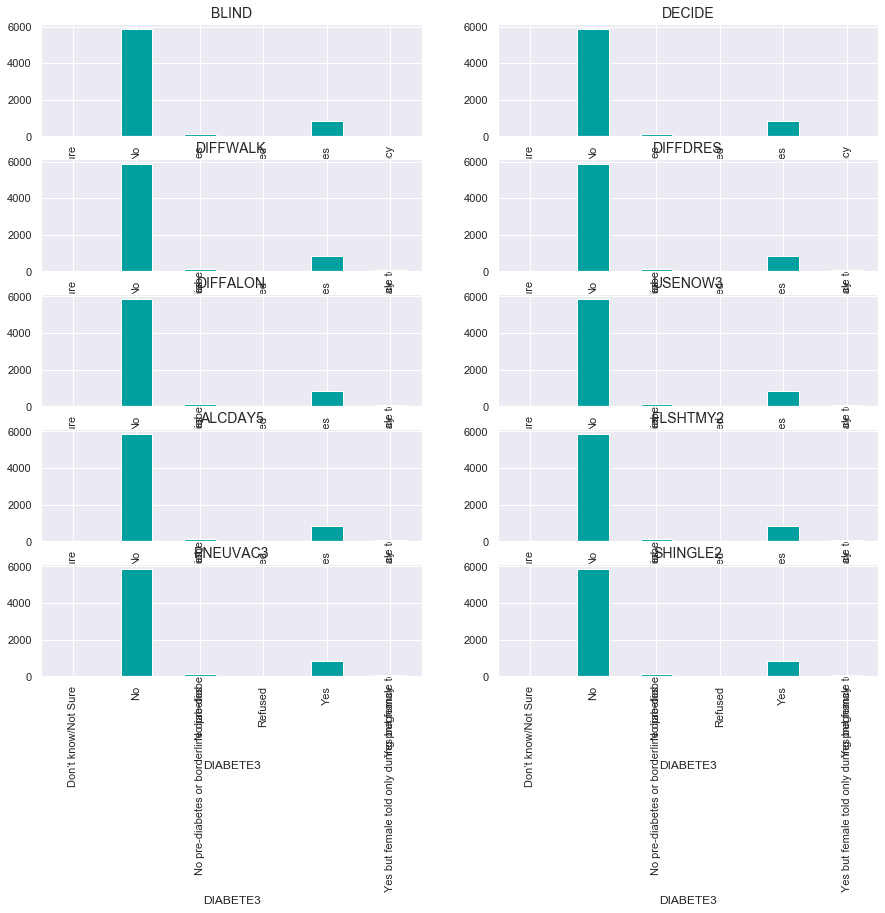

In [8]:
fig = plt.figure(figsize = (15,12))
strSBU = SBUstr.columns.values.tolist()[40:50]
for i, feature in enumerate(strSBU):
    ax = fig.add_subplot(5, 2, i+1)
    SBU.groupby('DIABETE3')[feature].count().plot(kind='bar', color = '#00A0A0')
    ax.set_title('%s'%(feature), fontsize = 14)
    
fig.tight_layout()
fig.show()

# Data Wrangling

## Dropped some Attributes
Several atributes with string type have only 1 categorical data. So we need to decrease number of feature to make high score on our predictive model. For Example, in the `STATE` feature, there is only a state - New York. But in the `'STATERES'`feature, we did not drop them even though it is only have 1 value.  `STATERES` still has missing value so we will use fit transformation to fill them.

In [9]:
x2 = list(set((SBUstr.columns.values).tolist())-set(['DIABETE3']))
x3 = []
x4 = []
for i in range(len(x2)) :
    x1 = SBU_X[x2[i]].unique().tolist()
    x3.append(len(x1))
    x4.append(SBU_X[x2[i]].isnull().sum())
Num_Uniq = pd.DataFrame({'Feature':x2,'Num_Unique':x3,'Missing_Value':x4})
print('Statistics description of Number of unique category in Features :')
display(Num_Uniq.describe())

print('_'*70+'\n')
print('Here the Feature with only a unique category :')
display(Num_Uniq[Num_Uniq['Num_Unique']==1])

Statistics description of Number of unique category in Features :


,Num_Unique,Missing_Value
count,103,103
mean,5,314
std,3,1397
min,1,0
25%,3,0
50%,4,0
75%,5,0
max,18,6722


______________________________________________________________________

Here the Feature with only a unique category :


,Feature,Num_Unique,Missing_Value
2,WTKG3,1,0
27,STATE,1,0
30,DENSTR2,1,0
55,HTM4,1,0
58,HTIN4,1,0
60,HEIGHT3,1,0
81,WEIGHT2,1,0
95,ZIPCODE,1,0


Based on the result of *feature with only single unique* category without missing value, we will remove them all. Especiallny with `CTYCODE1`, it is empty feature only.

In [10]:
SBU_X = SBU_X.drop(['CTYCODE1','STATE','HEIGHT3','WEIGHT2',
                    'HTIN4','HTM4','WTKG3','DENSTR2','ZIPCODE'], axis=1)

## Date Format
We will drop similar data which mean interview date. We will drop them all.

In [11]:
SBU_X = SBU_X.drop(['IDATE', 'IMONTH', 'IDAY', 'IYEAR'], axis=1)

In [12]:
print("Let's show Statistics Summary for SBU Feature Data :")
display(SBU_X.describe())
print('_'*70+'\n')
display(SBU_X.describe(include=["O"]))

Let's show Statistics Summary for SBU Feature Data :


,GEOSTR,REPNUM,REPDEPTH,DISPCODE,SEQNO,PSU,NATTMPTS,NRECSEL,NRECSTR,STATERES,LADULT,NUMADULT
count,6865,6865,6865,6865,6865,6865,6865,6865,6865,4696,4,4696
mean,133,60954,15,1117,2014003444,2014003444,5,24395,6740979,1,2,2
std,47,34768,9,38,1982,1982,4,11538,5109308,0,1,1
min,101,10001,1,1100,2014000012,2014000012,1,14544,1724447,1,1,1
25%,101,30170,8,1100,2014001728,2014001728,2,16600,2814308,1,1,1
50%,102,60039,15,1100,2014003444,2014003444,4,21545,2835024,1,2,2
75%,201,90249,23,1100,2014005160,2014005160,7,23130,13058666,1,2,2
max,202,120361,30,1200,2014006876,2014006876,17,55650,14358761,1,2,17


______________________________________________________________________



,PRECALL,FMONTH,PVTRESD1,COLGHOUS,CELLFON3,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD,HAVARTH3,ADDEPEV2,CHCKIDNY,AGE,MARITAL,CHILDREN,EDUCA,EMPLOY1,INCOME2,SEX,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,USENOW3,ALCDAY5,FLSHTMY2,PNEUVAC3,SHINGLE2,SEATBELT,DRNKDRI2,BLDSTOOL,PDIABTST,PREDIAB1,ASBIRDUC,BMI5,BMI5CAT,RFBMI5,CHLDCNT,SMOKER3,RFSMOK3,DRNKANY5,DROCDY3,RFBING5,DRNKDY4,DRNKMO4,RFDRHV4,RFDRMN4,RFDRWM4,FLSHOT6,PNEUMO2,RFSEAT2,RFSEAT3,RFBLDS2,RFBLDS3,HFOB3YR,FOBTFS,SSBSUGAR,SSBFRUT2,HEALTHCL1,LIFECHG,CNCSUMM,CNCINSTR,CDCPAID,CNCNOINS,HCVHEAR,HCVTEST,LASTHCVT,HCVINPTE,HCVINPTA,HCVPRIME,HCVPRIMA,HLTHPREG,PREGEVER,BRTHCNTL3,TYPCNTRL2,NOBCUSE2,PFCHLDFT,PRNTLVIT,REGION
count,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,750,6865,6865,6865,6865,6865,6865,436,244,143,6865,427,6865
unique,4,12,3,2,2,7,4,4,5,4,4,3,4,4,4,4,5,4,4,4,4,4,4,8,8,4,8,10,11,2,5,5,5,5,5,5,5,5,6,6,6,5,5,9,5,5,5,6,5,2,5,3,7,5,3,4,3,3,3,3,3,4,4,4,4,3,3,4,3,3,3,7,7,5,5,5,5,5,4,5,5,4,4,4,5,4,5,4,5,17,16,2,6,2
top,To be called,February,Yes,Missing,Yes,Very good,None,None,Not asked or Missing,Yes,Yes,Number of hours [1-24],No,No,No,No,Not asked or Missing,No,No,No,No,No,No,Age 65 or older,Married,None,College 4 years or more (College graduate),Employed for wages,$75000 or more,Female,Not asked or Missing,No,No,No,No,No,No,No,Not at all,No drinks in past 30 days,Not asked or Missing,No,No,Always,None,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,1 or greater,Normal Weight,Yes,No children in household,Never smoked,No,Yes,Drink-Occasions per day,No,Number of drinks per day,Number of Drinks,No,Respondent is female,No,Age Less Than 65,Age Less Than 65,Always or Almost Always Wear Seat Belt,Always Wear Seat Belt,No,Missing Age less than 50 Age greater than 75,Missing or Age less than 50 or Age greater tha...,Missing or Age less than 50 or Age greater tha...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Last Month and Year,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Yes,Male condoms,You want a pregnancy,Not asked or Missing,0 times a week,NYS exclusive of NYC
freq,6785,700,4692,6861,4696,2197,4099,4473,3121,6276,5122,6751,6490,6452,6630,5888,5906,6420,6274,6327,4694,5706,6677,2080,3110,4908,2973,2831,1970,3997,5697,4988,5706,6173,5874,5356,6175,5969,6286,2791,3983,3605,3061,5510,3480,2916,4046,4040,5122,6325,2328,3867,4908,3720,5573,3548,3548,5456,3470,3470,5944,3997,3438,4670,4670,5994,5569,3310,3827,3827,4119,4007,4011,5400,4017,6494,6494,6494,6494,4017,4018,429,6380,6804,4838,6659,6424,6429,245,89,40,6481,192,3879


## Missing Data

In [13]:
def check_miss(W) :    
    colx = W.columns.values.tolist()
    for i in range(len(colx)) :
        x = sum(W[W.columns[i]].isna())
        #isna() will give you same value as isnull()
        if x>0 :
            y = x/W.shape[0]*100
            print('Number of Missing value in SBU feature',colx[i],'is : {:d} items or {:0.1f}%.'.format(x,y))
            #print('='*75)

print("Let's check the Missing Data in SBU Feature's Column :\n\n")
check_miss(SBU_X)

Let's check the Missing Data in SBU Feature's Column :


Number of Missing value in SBU feature STATERES is : 2169 items or 31.6%.
Number of Missing value in SBU feature LADULT is : 6861 items or 99.9%.
Number of Missing value in SBU feature NUMADULT is : 2169 items or 31.6%.
Number of Missing value in SBU feature LASTHCVT is : 6115 items or 89.1%.
Number of Missing value in SBU feature BRTHCNTL3 is : 6429 items or 93.6%.
Number of Missing value in SBU feature TYPCNTRL2 is : 6621 items or 96.4%.
Number of Missing value in SBU feature NOBCUSE2 is : 6722 items or 97.9%.
Number of Missing value in SBU feature PRNTLVIT is : 6438 items or 93.8%.


### Filling Missing Value
We are going to fill all missing value with zero. Generally, we will drop the row or attribute to cut down number of missing value.But when we dealing with survey, some attribute can not filled because of relation with previous question. The survey questionnaire is designed for any condition for to be shown for next question. For example, if the interviewer give me a question to chose yes or no, so if I say yes, there will be A quetion. Otherwise, B question. We need to focus on data wrangling.

In [14]:
SBU_X.fillna(0,inplace=True)
print('Number of null data in SBU Feature now :')
display(SBU_X.isnull().sum())

Number of null data in SBU Feature now :


GEOSTR       0
PRECALL      0
REPNUM       0
REPDEPTH     0
FMONTH       0
DISPCODE     0
SEQNO        0
PSU          0
NATTMPTS     0
NRECSEL      0
NRECSTR      0
PVTRESD1     0
COLGHOUS     0
STATERES     0
CELLFON3     0
LADULT       0
NUMADULT     0
GENHLTH      0
PHYSHLTH     0
MENTHLTH     0
POORHLTH     0
HLTHPLN1     0
EXERANY2     0
SLEPTIM1     0
CVDINFR4     0
CVDCRHD4     0
CVDSTRK3     0
ASTHMA3      0
ASTHNOW      0
CHCSCNCR     0
CHCOCNCR     0
CHCCOPD      0
HAVARTH3     0
ADDEPEV2     0
CHCKIDNY     0
AGE          0
MARITAL      0
CHILDREN     0
EDUCA        0
EMPLOY1      0
INCOME2      0
SEX          0
PREGNANT     0
QLACTLM2     0
USEEQUIP     0
BLIND        0
DECIDE       0
DIFFWALK     0
DIFFDRES     0
DIFFALON     0
USENOW3      0
ALCDAY5      0
FLSHTMY2     0
PNEUVAC3     0
SHINGLE2     0
SEATBELT     0
DRNKDRI2     0
BLDSTOOL     0
PDIABTST     0
PREDIAB1     0
ASBIRDUC     0
BMI5         0
BMI5CAT      0
RFBMI5       0
CHLDCNT      0
SMOKER3      0
RFSMOK3   

### Label Encoder in Feature Data

We have checked that number of category in SBU Features String Data type could have more than 10 unique values. If we only did `LabelEncoder` from `sklearn`, we will get problem in modelling section. For that, we choose to use `Normalizer` algorithm to make it simple and implement into mass categories for Features.

Below here, we show you the label encoder for SBU Target data. It seems nice, but if the unique label be rise, it makes difficult calculation.

In [15]:
x = pd.DataFrame()
x['Y'] = LabelEncoder().fit_transform(SBU_Y)
x['Y'].unique()

array([1, 4, 2, 5, 0, 3], dtype=int64)

In [16]:
print('Compare with the count of value from SBU Target')
SBU_Y.value_counts()

Compare with the count of value from SBU Target


No                                           5848
Yes                                           842
No pre-diabetes or borderline diabetes        110
Yes but female told only during pregnancy      51
Refused                                         7
Don’t know/Not Sure                             7
Name: DIABETE3, dtype: int64

#### Relabel for Categorical Target

In [17]:
SBU_Y = pd.DataFrame()
SBU_Y['DIABETE3'] = SBU['DIABETE3']
print(np.unique(SBU_Y))

temp = pd.DataFrame()
temp['Lenc'] = LabelEncoder().fit_transform(SBU_Y)

#from sklearn.preprocessing import MinMaxScaler
#temp2 = [temp['Lenc'].values]
#scaler = MinMaxScaler(feature_range=(0,1))
#temp3 = (Normalizer().fit(temp2)).transform(temp2)
#temp3 = (scaler().fit(temp2)).transform(temp2)
#SBU_Y = pd.DataFrame({'DIABETE3' : temp3.flatten()})

SBU_Y = pd.DataFrame({'DIABETE3' : temp['Lenc']})
    
display(SBU_Y['DIABETE3'].describe())
display(SBU_Y['DIABETE3'].value_counts())
print('Type of Target Data',type(SBU_Y))
#print(np.unique(SBU_Y.DIABETE3))
#SBU_Y[:-1].value_counts()

['Don’t know/Not Sure' 'No' 'No pre-diabetes or borderline diabetes'
 'Refused' 'Yes' 'Yes but female told only during pregnancy']


c:\program files\python36\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


count   6865
mean       1
std        1
min        0
25%        1
50%        1
75%        1
max        5
Name: DIABETE3, dtype: float64

1    5848
4     842
2     110
5      51
3       7
0       7
Name: DIABETE3, dtype: int64

Type of Target Data <class 'pandas.core.frame.DataFrame'>


#### Relabel for Numeric Features

In [18]:
print('We will use Normalizer method to relabel the numeric value between 0 and 1.')
SBUnumr = SBU_X.select_dtypes(include=['float64','int64'])

numrSBU = SBUnumr.columns.values.tolist()
for i in range(len(numrSBU)):    
    temp = [SBU_X[numrSBU[i]].values]
    temp2 = (Normalizer().fit(temp)).transform(temp)
    SBU_X[numrSBU[i]] = pd.DataFrame({numrSBU[i] : temp2.flatten()})

We will use Normalizer method to relabel the numeric value between 0 and 1.


#### Relabel for String Features

In [19]:
print('We will use Label Encode and Normalizer method to relabel the category between 0 and 1.')
SBUstrX = SBU_X.select_dtypes(include=['object'])
strSBU = SBUstrX.columns.values.tolist()
for i in range(len(strSBU)):
    temp = pd.DataFrame()
    temp['Lenc'] = LabelEncoder().fit_transform(SBU_X[strSBU[i]].astype(str))
    #temp2 = [temp['Lenc'].values]
    #temp3 = (Normalizer().fit(temp2)).transform(temp2)
    SBU_X[strSBU[i]] = pd.DataFrame({strSBU[i] : temp['Lenc']})

We will use Label Encode and Normalizer method to relabel the category between 0 and 1.


In [20]:
pd.options.display.float_format = '{:.3f}'.format
display(SBU_X.describe())
display(SBU_X.dtypes)

,GEOSTR,PRECALL,REPNUM,REPDEPTH,FMONTH,DISPCODE,SEQNO,PSU,NATTMPTS,NRECSEL,NRECSTR,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD,HAVARTH3,ADDEPEV2,CHCKIDNY,AGE,MARITAL,CHILDREN,EDUCA,EMPLOY1,INCOME2,SEX,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,USENOW3,ALCDAY5,FLSHTMY2,PNEUVAC3,SHINGLE2,SEATBELT,DRNKDRI2,BLDSTOOL,PDIABTST,PREDIAB1,ASBIRDUC,BMI5,BMI5CAT,RFBMI5,CHLDCNT,SMOKER3,RFSMOK3,DRNKANY5,DROCDY3,RFBING5,DRNKDY4,DRNKMO4,RFDRHV4,RFDRMN4,RFDRWM4,FLSHOT6,PNEUMO2,RFSEAT2,RFSEAT3,RFBLDS2,RFBLDS3,HFOB3YR,FOBTFS,SSBSUGAR,SSBFRUT2,HEALTHCL1,LIFECHG,CNCSUMM,CNCINSTR,CDCPAID,CNCNOINS,HCVHEAR,HCVTEST,LASTHCVT,HCVINPTE,HCVINPTA,HCVPRIME,HCVPRIMA,HLTHPREG,PREGEVER,BRTHCNTL3,TYPCNTRL2,NOBCUSE2,PFCHLDFT,PRNTLVIT,REGION
count,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000
mean,0.011,1.017,0.010,0.011,5.312,0.012,0.012,0.012,0.009,0.011,0.010,1.368,0.001,0.010,0.684,0.000,0.009,3.514,1.392,1.341,1.931,2.829,2.493,0.997,1.090,1.104,1.061,1.278,2.152,1.125,1.166,0.226,1.618,1.328,1.046,3.352,2.764,0.571,1.317,4.395,4.103,0.418,1.850,1.709,1.398,1.188,1.308,1.538,1.179,1.267,2.948,1.687,3.483,1.924,0.931,0.839,1.504,1.954,2.320,1.732,1.813,0.079,1.861,1.485,3.448,3.152,1.055,2.098,1.330,1.030,1.099,1.099,0.958,1.579,1.425,0.775,0.773,0.171,0.272,1.595,1.520,0.691,1.599,2.403,2.258,0.897,0.728,1.034,1.099,1.149,0.955,2.102,1.119,0.232,0.973,1.011,0.876,1.035,1.039,1.066,0.215,0.277,0.178,0.056,0.166,0.435
std,0.004,0.199,0.006,0.006,3.289,0.000,0.000,0.000,0.008,0.005,0.007,0.930,0.024,0.007,0.465,0.012,0.008,1.899,0.554,0.530,0.762,0.560,0.870,0.129,0.435,0.459,0.353,0.696,0.651,0.488,0.556,0.785,0.931,0.745,0.312,1.635,1.836,0.908,1.202,2.883,3.442,0.493,0.411,1.234,0.965,0.646,0.850,1.100,0.624,0.783,0.366,1.482,0.793,1.454,1.240,1.903,0.528,1.058,1.051,0.714,0.537,0.269,1.015,0.638,1.042,1.213,0.430,0.968,0.612,0.452,0.950,0.950,0.364,0.591,0.638,1.196,1.203,0.480,0.603,0.659,0.570,0.589,0.492,1.448,1.372,0.649,0.790,0.469,0.586,0.659,0.247,1.492,1.131,0.735,0.311,0.165,0.723,0.304,0.516,0.433,0.952,1.699,1.465,0.230,0.789,0.496
min,0.009,0.000,0.002,0.001,0.000,0.012,0.012,0.012,0.002,0.007,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.009,1.000,0.005,0.005,3.000,0.012,0.012,0.012,0.004,0.007,0.004,0.000,0.000,0.000,0.000,0.000,0.000,2.000,1.000,1.000,1.000,3.000,1.000,1.000,1.000,1.000,1.000,1.000,2.000,1.000,1.000,0.000,1.000,1.000,1.000,2.000,2.000,0.000,1.000,2.

GEOSTR       float64
PRECALL        int32
REPNUM       float64
REPDEPTH     float64
FMONTH         int32
DISPCODE     float64
SEQNO        float64
PSU          float64
NATTMPTS     float64
NRECSEL      float64
NRECSTR      float64
PVTRESD1       int32
COLGHOUS       int32
STATERES     float64
CELLFON3       int32
LADULT       float64
NUMADULT     float64
GENHLTH        int32
PHYSHLTH       int32
MENTHLTH       int32
POORHLTH       int32
HLTHPLN1       int32
EXERANY2       int32
SLEPTIM1       int32
CVDINFR4       int32
CVDCRHD4       int32
CVDSTRK3       int32
ASTHMA3        int32
ASTHNOW        int32
CHCSCNCR       int32
CHCOCNCR       int32
CHCCOPD        int32
HAVARTH3       int32
ADDEPEV2       int32
CHCKIDNY       int32
AGE            int32
MARITAL        int32
CHILDREN       int32
EDUCA          int32
EMPLOY1        int32
INCOME2        int32
SEX            int32
PREGNANT       int32
QLACTLM2       int32
USEEQUIP       int32
BLIND          int32
DECIDE         int32
DIFFWALK     

### String Object Checking
We want make sure there is no feature was leave to relabel. If there is no feature name shown inside the array, we are success to relabel all features.

In [21]:
SBUstr = SBU_X.select_dtypes(include=['object'])
print('For String Data, we have :')
display(SBUstr.columns.values)

For String Data, we have :


array([], dtype=object)

# Feature Selection
We will try to use feature selection to get better result

In [22]:
#Initial Setting Array from Dataframe
Xrfe = SBU_X.values
Yrfe = SBU_Y['DIABETE3'].values

## Univariate Selection using Chi Squares

In [23]:
# By Chi Squares

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

testchi1 = SelectKBest(score_func = chi2, k = 50)
testchi2 = testchi1.fit(Xrfe, Yrfe)

np.set_printoptions(precision = 3)
resultchi = testchi2.scores_
featurechi = testchi2.transform(Xrfe)

cobachi = pd.DataFrame({
    'index' : SBU_X.columns.values,
    'Chi_Square' : resultchi
})

display(cobachi.sort_values(['Chi_Square'], ascending=0))

,index,Chi_Square
76,PNEUMO2,427.448
39,EMPLOY1,417.470
75,FLSHOT6,396.435
31,CHCCOPD,379.811
86,LIFECHG,342.401
47,DIFFWALK,292.233
53,PNEUVAC3,255.104
35,AGE,252.174
101,TYPCNTRL2,241.671
44,USEEQUIP,235.468


## LVC feature selection

In [24]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(Xrfe, Yrfe)
model = SelectFromModel(lsvc,prefit=True)
cobaLVC = pd.DataFrame(model.get_support(), columns = ['LVC'], index=SBU_X.columns)
cobaLVC = cobaLVC.reset_index()
cobaLVC[cobaLVC['LVC'] == True]

c:\program files\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,index,LVC
4,FMONTH,True
11,PVTRESD1,True
17,GENHLTH,True
19,MENTHLTH,True
20,POORHLTH,True
21,HLTHPLN1,True
22,EXERANY2,True
24,CVDINFR4,True
25,CVDCRHD4,True
27,ASTHMA3,True


## Recursive Feature Elimination

In [25]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#feature extraction
model2 = LogisticRegression(solver='lbfgs')
rfe = RFE(model2, 50)
fit2 = rfe.fit(Xrfe,Yrfe)

cobarfe = pd.DataFrame({
    'index' : SBU_X.columns.values,
    'Select_Features' : fit2.support_,
    'Ranking' : fit2.ranking_
})
cobarfe2 = pd.DataFrame({'index' : SBU_X.columns.values,
    'RFE' : fit2.support_})
display(cobarfe.sort_values(['Ranking'], ascending=True))

c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number o

c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number o

c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to si

c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Conve

c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Conve

c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Conve

c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to si

c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to si

c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number o

c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number o

,index,Select_Features,Ranking
105,REGION,True,1
31,CHCCOPD,True,1
32,HAVARTH3,True,1
73,RFDRMN4,True,1
34,CHCKIDNY,True,1
35,AGE,True,1
72,RFDRHV4,True,1
37,CHILDREN,True,1
71,DRNKMO4,True,1
70,DRNKDY4,True,1


## Variable Importance using Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(Xrfe,Yrfe)

preds = clf.predict(Xrfe)

from sklearn.metrics import accuracy_score
accuracyRF = accuracy_score(preds,Yrfe)
print('The Accuration is',accuracyRF)
cobaRF = pd.DataFrame(clf.feature_importances_, columns = ["Random_Forest"], index=SBU_X.columns)
cobaRF = cobaRF.reset_index()
cobaRF.sort_values(['Random_Forest'],ascending=0)

c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The Accuration is 0.9899490167516387


,index,Random_Forest
59,PREDIAB1,0.095
2,REPNUM,0.041
3,REPDEPTH,0.033
58,PDIABTST,0.027
4,FMONTH,0.026
8,NATTMPTS,0.025
84,SSBFRUT2,0.023
10,NRECSTR,0.022
40,INCOME2,0.022
85,HEALTHCL1,0.021


## Variable Importance using Extratrees Classifier

In [27]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(Xrfe, Yrfe)
print('The importance variance ratio total from Extra Tree Classifier : %s' % sum(model.feature_importances_))
cobaEC = pd.DataFrame(model.feature_importances_, columns = ["Extratrees"], index=SBU_X.columns)
cobaEC = cobaEC.reset_index()
cobaEC.sort_values(['Extratrees'],ascending=0)

The importance variance ratio total from Extra Tree Classifier : 1.0000000000000004


c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,index,Extratrees
58,PDIABTST,0.054
59,PREDIAB1,0.038
86,LIFECHG,0.035
85,HEALTHCL1,0.023
39,EMPLOY1,0.021
17,GENHLTH,0.020
3,REPDEPTH,0.019
2,REPNUM,0.019
8,NATTMPTS,0.018
62,BMI5CAT,0.018


## Principal component analysis

In [28]:
from sklearn.decomposition import PCA

pca = PCA().fit(Xrfe,Yrfe)
np.set_printoptions(formatter = {'float_kind':'{:f}'.format}, precision = 2)
pd.options.display.float_format = '{:.3f}'.format
vartor = np.around(pca.explained_variance_ratio_*100,2)
#print('Explained variance by each component: %s' % vartor)
ratio_var = pd.DataFrame({'PCA' : vartor.tolist()}, index=SBU_X.columns)
ratio_var = ratio_var.reset_index()
ratio_var2 = ratio_var.sort_values(by='PCA', ascending=False)
display(ratio_var2)

,index,PCA
0,GEOSTR,13.350
1,PRECALL,10.750
2,REPNUM,10.430
3,REPDEPTH,5.860
4,FMONTH,4.310
5,DISPCODE,4.130
6,SEQNO,4.010
7,PSU,3.500
8,NATTMPTS,3.140
9,NRECSEL,2.730


### Cummulative Probability Distribution

Cummulative variance ratio for PCA analysis as dimentional reduction methods.


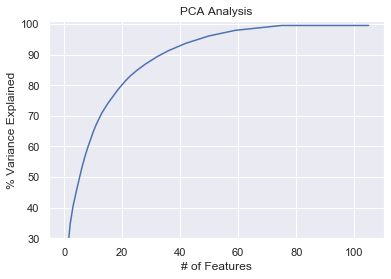

In [29]:
print('Cummulative variance ratio for PCA analysis as dimentional reduction methods.')
varpca = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,101)
plt.style.context('seaborn-whitegrid')
plt.plot(varpca)
plt.show()

### Choose the Feature with 90% Data Concentrate

In PCA output, you can observe how the initial variance of the dataset distributes across the components (for instance, here the `first component accounts` for 10.1% of the variance initially present in the dataset) and the resulting PCA matrix of components, where each component (displayed in the rows) relates to each original variable (placed on the columns) as in the dataframe.

In this decomposition of the Diabetes Health dataset, the vector array provided by `explained_variance_ratio_` indicates that most of the information is concentrated into the first component (10.1%). It’s therefore possible to reduce the entire dataset to just **around 50 components**, providing a reduction of noise and redundant information from the original dataset.

Let's check number of features which i could input for next analysis.

In [30]:
ratio_var2['Cumulative'] = varpca.tolist()
feanm = ratio_var2[ratio_var2['Cumulative']<91]['index'].to_list()
print('{:d} Feature name which follow the next analytic according to PCA: \n{}'.format(len(feanm),feanm))

36 Feature name which follow the next analytic according to PCA: 
['GEOSTR', 'PRECALL', 'REPNUM', 'REPDEPTH', 'FMONTH', 'DISPCODE', 'SEQNO', 'PSU', 'NATTMPTS', 'NRECSEL', 'NRECSTR', 'PVTRESD1', 'COLGHOUS', 'STATERES', 'CELLFON3', 'LADULT', 'NUMADULT', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'HLTHPLN1', 'EXERANY2', 'SLEPTIM1', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD', 'HAVARTH3', 'ADDEPEV2', 'CHCKIDNY', 'AGE']


## Vote Each Variable Selection

In [31]:
from functools import reduce
dfs = [cobachi, cobaLVC, cobarfe2, cobaRF, cobaEC, ratio_var]
final_results = reduce(lambda left,right: pd.merge(left,right,on='index',how='outer'), dfs)

columns = ['Chi_Square', 'Random_Forest', 'Extratrees', 'PCA']

score_table = pd.DataFrame({},[])
score_table['index'] = final_results['index']

for i in columns:
    score_table[i] = final_results['index'].isin(list(final_results.nlargest(5,i)['index'])).astype(int)

score_table['RFE'] = final_results['RFE'].astype(int)
score_table['LVC'] = final_results['LVC'].astype(int)

score_table['final_score'] = score_table.sum(axis=1)

score_table.sort_values('final_score',ascending=0)

,index,Chi_Square,Random_Forest,Extratrees,PCA,RFE,LVC,final_score
58,PDIABTST,0,1,1,0,1,1,4
86,LIFECHG,1,0,1,0,1,1,4
4,FMONTH,0,1,0,1,1,1,4
59,PREDIAB1,0,1,1,0,1,1,4
31,CHCCOPD,1,0,0,0,1,1,3
76,PNEUMO2,1,0,0,0,1,1,3
39,EMPLOY1,1,0,1,0,0,1,3
82,FOBTFS,0,0,0,0,1,1,2
22,EXERANY2,0,0,0,0,1,1,2
73,RFDRMN4,0,0,0,0,1,1,2


## Multicollinearity

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(features):
    vif = pd.DataFrame()
    vif["Features"] = features.columns
    vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]    
    return(vif)

SBU_X2 = SBU_X[list(score_table[score_table['final_score'] > 1]['index'])]

vif = calculate_vif(SBU_X2)
while vif['VIF'][vif['VIF'] > 10].any():
    remove = vif.sort_values('VIF',ascending=0)['Features'][:1]
    SBU_X2.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(SBU_X2)
    
list_Features = list(vif['Features'])
print('Based on scoring multicollinearity for each feature selection,\n {:d} Feature name which follow the next analytic: \n{}'.format(len(list_Features),list_Features))

c:\program files\python36\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Based on scoring multicollinearity for each feature selection,
 23 Feature name which follow the next analytic: 
['REPNUM', 'REPDEPTH', 'FMONTH', 'MENTHLTH', 'POORHLTH', 'EXERANY2', 'CVDINFR4', 'CVDCRHD4', 'CHCCOPD', 'HAVARTH3', 'EMPLOY1', 'USEEQUIP', 'BLIND', 'DIFFWALK', 'ALCDAY5', 'BLDSTOOL', 'PDIABTST', 'PREDIAB1', 'BMI5CAT', 'RFDRWM4', 'PNEUMO2', 'HEALTHCL1', 'LIFECHG']


In [33]:
xtitle = score_table[score_table['final_score'] > 1].sort_values('final_score',ascending=0)
xlist = xtitle['index'].to_list()
print('Lenght of all title =',len(xlist))
print(xlist)

Lenght of all title = 32
['LIFECHG', 'FMONTH', 'PDIABTST', 'PREDIAB1', 'EMPLOY1', 'PNEUMO2', 'CHCCOPD', 'ASBIRDUC', 'BLDSTOOL', 'RFBMI5', 'BMI5CAT', 'USENOW3', 'RFDRMN4', 'RFDRWM4', 'FOBTFS', 'HEALTHCL1', 'ALCDAY5', 'PRECALL', 'DIFFWALK', 'REPNUM', 'USEEQUIP', 'AGE', 'HAVARTH3', 'ASTHNOW', 'CVDCRHD4', 'CVDINFR4', 'EXERANY2', 'HLTHPLN1', 'POORHLTH', 'MENTHLTH', 'REPDEPTH', 'BLIND']


## Update the Feature Data

In [34]:
SBU_X = SBU_X[list_Features]
display(SBU_X.describe())

,REPNUM,REPDEPTH,FMONTH,MENTHLTH,POORHLTH,EXERANY2,CVDINFR4,CVDCRHD4,CHCCOPD,HAVARTH3,EMPLOY1,USEEQUIP,BLIND,DIFFWALK,ALCDAY5,BLDSTOOL,PDIABTST,PREDIAB1,BMI5CAT,RFDRWM4,PNEUMO2,HEALTHCL1,LIFECHG
count,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000,6865.000
mean,0.010,0.011,5.312,1.341,1.931,2.493,1.090,1.104,0.226,1.618,4.395,1.398,1.188,1.538,1.687,1.954,2.320,1.732,1.861,1.425,0.773,0.897,0.728
std,0.006,0.006,3.289,0.530,0.762,0.870,0.435,0.459,0.785,0.931,2.883,0.965,0.646,1.100,1.482,1.058,1.051,0.714,1.015,0.638,1.203,0.649,0.790
min,0.002,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.005,0.005,3.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,2.000,1.000,1.000,1.000,0.000,1.000,2.000,1.000,1.000,1.000,0.000,1.000,0.000
50%,0.010,0.010,5.000,1.000,2.000,3.000,1.000,1.000,0.000,1.000,2.000,1.000,1.000,1.000,1.000,2.000,2.000,2.000,2.000,1.000,0.000,1.000,1.000
75%,0.016,0.016,8.000,2.000,2.000,3.000,1.000,1.000,0.000,3.000,7.000,1.000,1.000,1.000,3.000,2.000,2.000,2.000,3.000,2.000,2.000,1.000,1.000
max,0.021,0.021,11.000,3.000,4.000,3.000,3.000,3.000,3.000,3.000,9.000,4.000,4.000,4.000,5.000,4.000,4.000,5.000,4.000,3.000,3.000,4.000,4.000


## Visualized the Selection Data

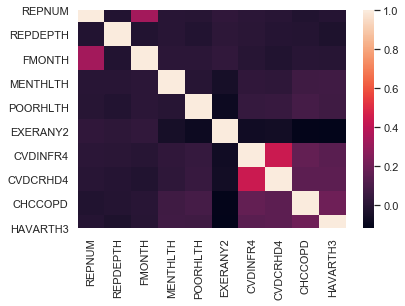

In [35]:
corr = SBU_X[['REPNUM', 'REPDEPTH', 'FMONTH', 'MENTHLTH', 'POORHLTH', 
              'EXERANY2', 'CVDINFR4', 'CVDCRHD4', 'CHCCOPD', 
              'HAVARTH3']].corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

In [36]:
# import packages
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

c:\program files\python36\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


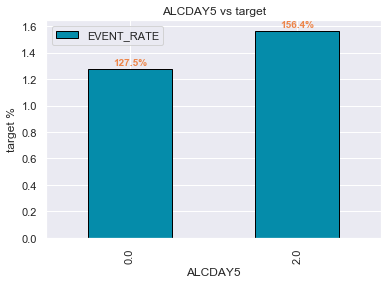

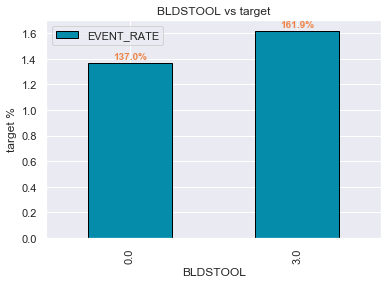

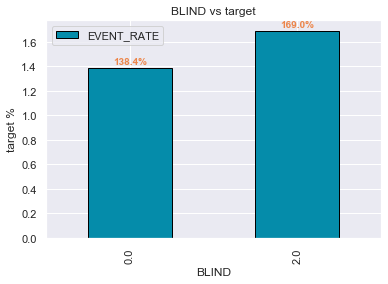

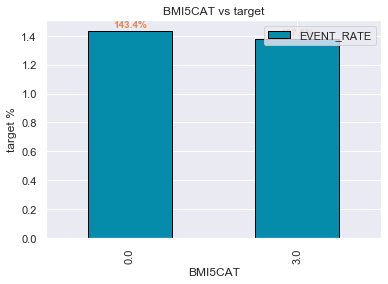

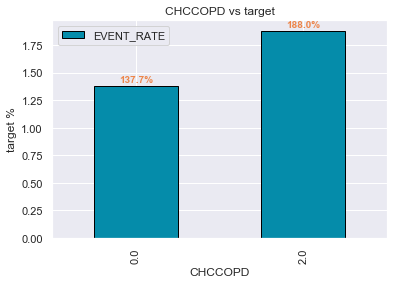

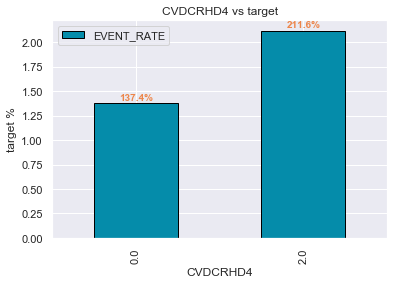

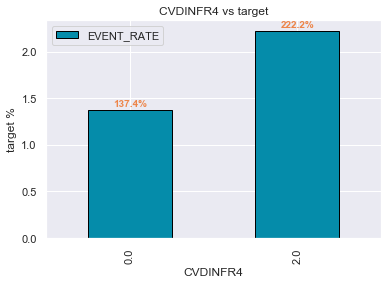

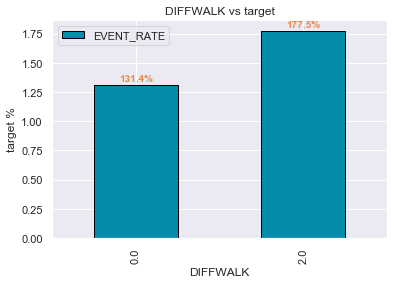

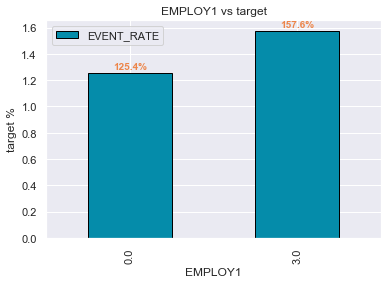

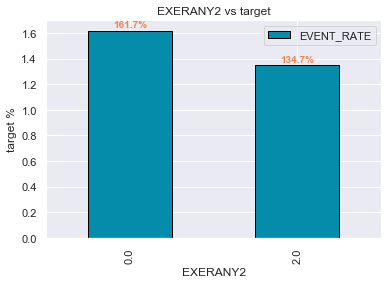

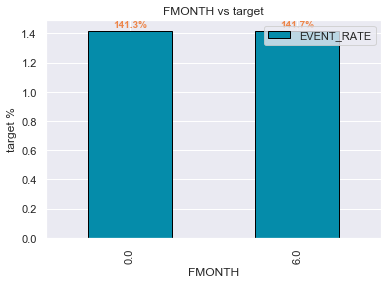

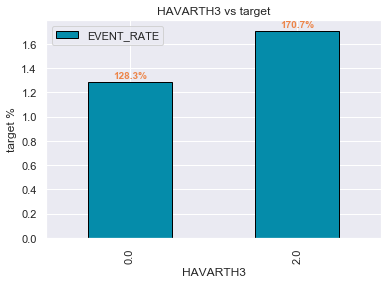

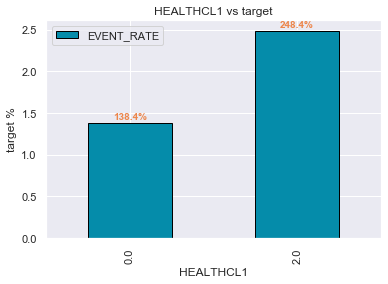

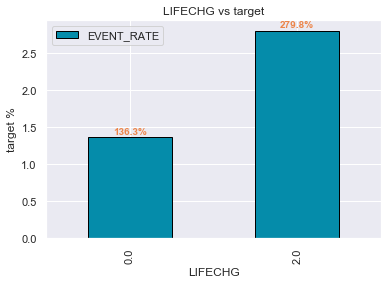

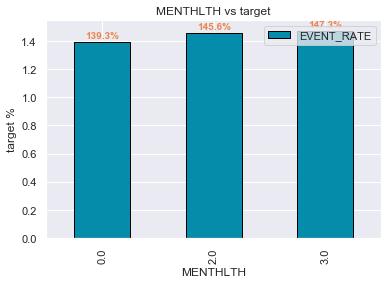

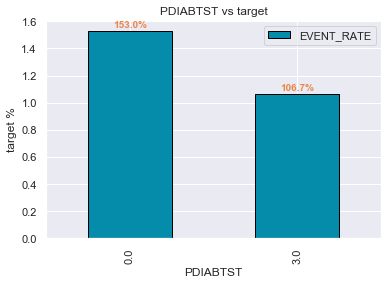

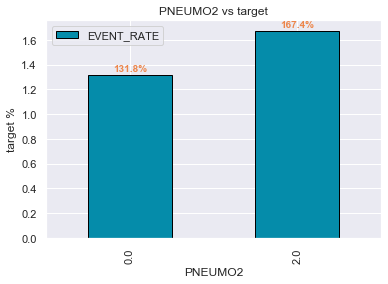

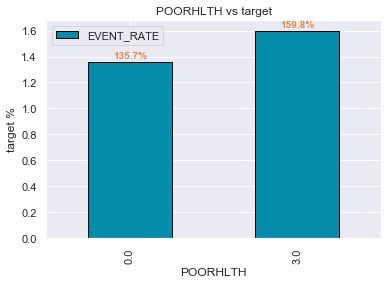

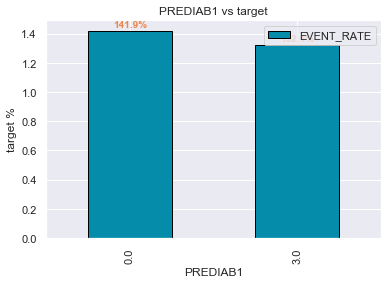

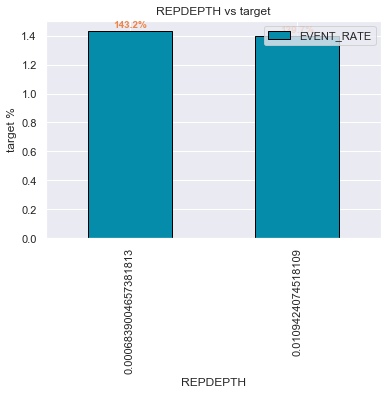

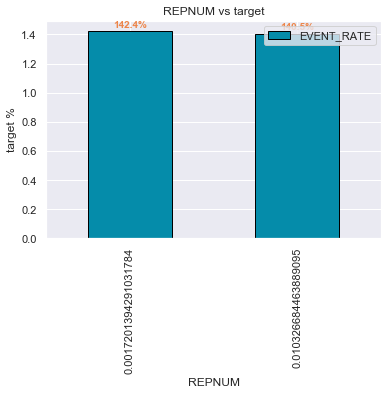

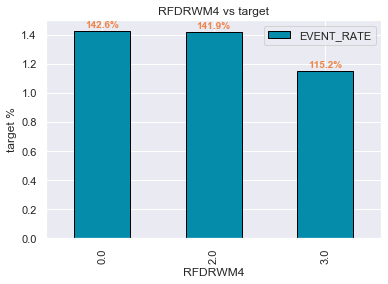

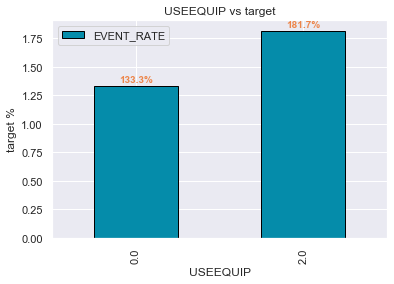

In [37]:
bar_color = '#058caa'
num_color = '#ed8549'

final_vars = list(vif['Features']) + ['target']

df = SBU_X.copy()
df['target'] = SBU_Y['DIABETE3']

df1 = df[final_vars].fillna(0)

final_iv,_ = data_vars(df1,df1['target'])
final_iv = final_iv[(final_iv.VAR_NAME != 'target')]
grouped = final_iv.groupby(['VAR_NAME'])
for key, group in grouped:
    ax = group.plot('MIN_VALUE','EVENT_RATE',kind='bar',color=bar_color,linewidth=1.0,edgecolor=['black'])
    ax.set_title(str(key) + " vs " + str('target'))
    ax.set_xlabel(key)
    ax.set_ylabel(str('target') + " %")
    rects = ax.patches
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.01*height, str(round(height*100,1)) + '%', 
                ha='center', va='bottom', color=num_color, fontweight='bold')

# Prediction Model
for Supervised Learning plus Classification and Regression, our choice of models to are:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(SBU_X, SBU_Y, random_state = 1, test_size = 0.4)
y_train = Y_train.copy()
y_test = Y_test.copy()

features_train = X_train.copy()
label_train = Y_train.copy()
features_test = X_test.copy()
label_test = Y_test.copy()

print('Dimension of Trainning Data of Features : {}'.format(X_train.shape))
print('Dimension of Test Data of Features : {}'.format(X_test.shape))

Dimension of Trainning Data of Features : (4119, 23)
Dimension of Test Data of Features : (2746, 23)


In [39]:
def MSE(ytests,ypredicts) :
    ytlist = ytests.to_list()
    yplist = ypredicts.tolist()
    holdz = []
    for i in range(len(ytlist)):
        temp = (ytlist[i] - yplist[i])**2
        holdz.append(temp)
    mses = sum(holdz)/len(ytlist)
    Variance = np.var(ypredicts)
    Biases = np.sqrt(mses - Variance)
    sentence = 'The MSE is {:0.3f} \nThe Variance is {:0.3f} \nThe Biased is {:0.3f}'
    print(sentence.format(mses, Variance, Biases))
    return [mses, Variance, Biases]

## Logistic regression
It measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features)

Note the confidence score generated by the model based on the training dataset.

### Prediction and Accuration

In [40]:
# Logistic Regression
from sklearn.metrics import accuracy_score
from sklearn import metrics

logreg = LogisticRegression(solver='lbfgs')
#logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,Y_train)

pred_train = logreg.predict(X_train)
pred_test = logreg.predict(X_test)
pred_logistic = pred_test.copy()

accuracy_train = accuracy_score(pred_train,Y_train)
accuracy_test = accuracy_score(pred_test,Y_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

#Auc = Area under Curve
#Roc = Receiver Operating Characteristics
fpr, tpr, _ = metrics.roc_curve(np.array(Y_train),logreg.predict_proba(X_train)[:,1],pos_label=1)
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(Y_test),logreg.predict_proba(X_test)[:,1],pos_label=1)
auc_test = metrics.auc(fpr,tpr)

acc_log2 = round(accuracy_train*100,2)
print('Accuracy of Train Data =',acc_log2,'%.')
print('Accuracy of Test Data =',round(accuracy_test*100,2),'%.')
print('AUC coeficient of Train Data =',round(auc_train*100,2),'%.')
print('AUC coeficient of Test Data =',round(auc_test*100,2),'%.')
print('Accuracy of Training X and Y Data =',acc_log,'%.')

c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Accuracy of Train Data = 86.26 %.
Accuracy of Test Data = 86.34 %.
AUC coeficient of Train Data = 81.36 %.
AUC coeficient of Test Data = 79.26 %.
Accuracy of Training X and Y Data = 86.26 %.


### Confusion Matrix and Cross Tabulation

In [41]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix test for logistic regression')
Conf_Logtrain = confusion_matrix(Y_train, pred_train)
display(Conf_Logtrain)
print('Cross Tabulation for test data in logistic regression')
display(pd.crosstab(Y_train['DIABETE3'],pd.Series(pred_train),rownames=['ACTUAL'],colnames=['PRED']))

print('_'*70+'\n')

print('Confusion Matrix test for logistic regression')
Conf_Logtest = confusion_matrix(Y_test, pred_test)
display(Conf_Logtest)
print('Cross Tabulation for test data in logistic regression')
display(pd.crosstab(Y_test['DIABETE3'],pd.Series(pred_test),rownames=['ACTUAL'],colnames=['PRED']))

Confusion Matrix test for logistic regression


array([[   0,    7,    0,    0,    0,    0],
       [   0, 3424,    1,    0,   64,    0],
       [   0,   66,    0,    0,    8,    0],
       [   0,    1,    0,    0,    2,    0],
       [   0,  390,    0,    0,  129,    0],
       [   0,   25,    0,    0,    2,    0]], dtype=int64)

Cross Tabulation for test data in logistic regression


PRED,1,2,4
ACTUAL,,,
0,3,0,1
1,1947,1,96
2,48,0,2
3,2,0,0
4,337,0,23
5,10,0,1


______________________________________________________________________

Confusion Matrix test for logistic regression


array([[2301,    0,    0,   58,    0],
       [  27,    0,    0,    9,    0],
       [   2,    0,    0,    2,    0],
       [ 253,    0,    0,   70,    0],
       [  21,    0,    0,    3,    0]], dtype=int64)

Cross Tabulation for test data in logistic regression


PRED,1,4
ACTUAL,,
1,869,49
2,17,0
4,129,10
5,12,1


### Mean Square Error

In [42]:
print('Variance and Biased for Train Prediction')
MSE(Y_train['DIABETE3'],pred_train)

print('_'*70+'\n')

print('Variance and Biased for Test Prediction')
MSE_LOG = MSE(Y_test['DIABETE3'],pred_test)

Variance and Biased for Train Prediction
The MSE is 1.117 
The Variance is 0.426 
The Biased is 0.831
______________________________________________________________________

Variance and Biased for Test Prediction
The MSE is 1.169 
The Variance is 0.441 
The Biased is 0.853


### Coeficient of Logistic Regression

In [43]:
pd.options.display.float_format = '{:.2f}'.format
coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
3,MENTHLTH,0.48
13,DIFFWALK,0.41
6,CVDINFR4,0.40
7,CVDCRHD4,0.40
12,BLIND,0.39
19,RFDRWM4,0.24
20,PNEUMO2,0.20
21,HEALTHCL1,0.12
18,BMI5CAT,0.05
0,REPNUM,0.02


- MENTHLTH is highest positive coefficient,
- PREDIAB1 is lowest negative coefficient,
- This way DIFFWALK is a good artificial feature to model as it has second highest positive coeficient (as causal) with DIABETE3.

## Random Forest

In [44]:
RFc = RandomForestClassifier()
RFc.fit(X_train,Y_train)

pred_trainRF = RFc.predict(X_train)
pred_testRF = RFc.predict(X_test)

accuracy_trainRF = accuracy_score(pred_trainRF,Y_train)
accuracy_testRF = accuracy_score(pred_testRF,Y_test)

#Auc = Area under Curve
#Roc = Receiver Operating Characteristics
fpr, tpr, _ = metrics.roc_curve(np.array(Y_train),RFc.predict_proba(X_train)[:,1],pos_label=1)
auc_trainRF = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(Y_test),RFc.predict_proba(X_test)[:,1],pos_label=1)
auc_testRF = metrics.auc(fpr,tpr)

acc_RF = round(accuracy_trainRF*100,2)
print('Accuracy of Train Data =',acc_RF,'%.')
print('Accuracy of Test Data =',round(accuracy_testRF*100,2),'%.')
print('AUC coeficient of Train Data =',round(auc_trainRF*100,2),'%.')
print('AUC coeficient of Test Data =',round(auc_testRF*100,2),'%.')

Accuracy of Train Data = 99.1 %.
Accuracy of Test Data = 90.28 %.
AUC coeficient of Train Data = 99.98 %.
AUC coeficient of Test Data = 83.07 %.


c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [45]:
print('Confusion Matrix test for Random Forest')
display(confusion_matrix(Y_train, pred_trainRF))
print('Cross Tabulation for test data in Random Forest')
display(pd.crosstab(Y_train['DIABETE3'],pd.Series(pred_trainRF),rownames=['ACTUAL'],colnames=['PRED']))

print('_'*70+'\n')

print('Confusion Matrix test for Random Forest')
display(confusion_matrix(Y_test, pred_testRF))
print('Cross Tabulation for test data in Random Forest')
display(pd.crosstab(Y_test['DIABETE3'],pd.Series(pred_testRF),rownames=['ACTUAL'],colnames=['PRED']))

Confusion Matrix test for Random Forest


array([[   7,    0,    0,    0,    0,    0],
       [   0, 3488,    0,    0,    1,    0],
       [   0,    5,   68,    0,    1,    0],
       [   0,    1,    0,    2,    0,    0],
       [   0,   26,    0,    0,  493,    0],
       [   0,    3,    0,    0,    0,   24]], dtype=int64)

Cross Tabulation for test data in Random Forest


PRED,0,1,2,4,5
ACTUAL,,,,,
0,0,3,0,1,0
1,4,1769,37,223,11
2,0,45,2,3,0
3,0,1,0,1,0
4,1,302,4,52,1
5,0,8,0,3,0


______________________________________________________________________

Confusion Matrix test for Random Forest


array([[2328,    1,    0,   29,    1],
       [  33,    0,    0,    3,    0],
       [   4,    0,    0,    0,    0],
       [ 172,    0,    0,  151,    0],
       [  23,    0,    0,    1,    0]], dtype=int64)

Cross Tabulation for test data in Random Forest


PRED,1,4
ACTUAL,,
1,854,64
2,15,2
4,130,9
5,13,0


In [46]:
print('Variance and Biased for Train Prediction')
MSE(Y_train['DIABETE3'],pred_trainRF)

print('_'*70+'\n')

print('Variance and Biased for Test Prediction')
MSE_RF = MSE(Y_test['DIABETE3'],pred_testRF)

Variance and Biased for Train Prediction
The MSE is 0.074 
The Variance is 1.035 
The Biased is nan
______________________________________________________________________

Variance and Biased for Test Prediction
The MSE is 0.822 
The Variance is 0.568 
The Biased is 0.503


c:\program files\python36\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


## Neural Network

In [47]:
from sklearn.neural_network import MLPClassifier
NNc = MLPClassifier()

NNc.fit(X_train,Y_train)

pred_trainNN = NNc.predict(X_train)
pred_testNN = NNc.predict(X_test)

accuracy_trainNN = accuracy_score(pred_trainNN,Y_train)
accuracy_testNN = accuracy_score(pred_testNN,Y_test)

#Auc = Area under Curve
#Roc = Receiver Operating Characteristics
fpr, tpr, _ = metrics.roc_curve(np.array(Y_train),NNc.predict_proba(X_train)[:,1],pos_label=1)
auc_trainNN = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(Y_test),NNc.predict_proba(X_test)[:,1],pos_label=1)
auc_testNN = metrics.auc(fpr,tpr)

acc_NN = round(accuracy_trainNN*100,2)
print('Accuracy of Train Data =',acc_NN,'%.')
print('Accuracy of Test Data =',round(accuracy_testNN*100,2),'%.')
print('AUC coeficient of Train Data =',round(auc_trainNN*100,2),'%.')
print('AUC coeficient of Test Data =',round(auc_testNN*100,2),'%.')

c:\program files\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Train Data = 93.59 %.
Accuracy of Test Data = 87.98 %.
AUC coeficient of Train Data = 95.58 %.
AUC coeficient of Test Data = 85.59 %.


c:\program files\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [48]:
print('Confusion Matrix test for Neural Network')
display(confusion_matrix(Y_train, pred_trainNN))
print('Cross Tabulation for test data in Neural Network')
display(pd.crosstab(Y_train['DIABETE3'],pd.Series(pred_trainNN),rownames=['ACTUAL'],colnames=['PRED']))

print('_'*70+'\n')

print('Confusion Matrix test for Neural Network')
display(confusion_matrix(Y_test, pred_testNN))
print('Cross Tabulation for test data in Neural Network')
display(pd.crosstab(Y_test['DIABETE3'],pd.Series(pred_testNN),rownames=['ACTUAL'],colnames=['PRED']))

Confusion Matrix test for Neural Network


array([[   0,    7,    0,    0,    0,    0],
       [   0, 3441,    4,    0,   44,    0],
       [   0,   44,   27,    0,    3,    0],
       [   0,    1,    0,    2,    0,    0],
       [   0,  139,    0,    0,  380,    0],
       [   0,   22,    0,    0,    0,    5]], dtype=int64)

Cross Tabulation for test data in Neural Network


PRED,1,2,4,5
ACTUAL,,,,
0,3,0,1,0
1,1828,15,199,2
2,45,0,5,0
3,1,0,1,0
4,316,1,42,1
5,7,0,4,0


______________________________________________________________________

Confusion Matrix test for Neural Network


array([[2250,   10,    0,   99,    0],
       [  26,    3,    0,    7,    0],
       [   2,    0,    0,    2,    0],
       [ 160,    0,    0,  163,    0],
       [  21,    0,    0,    3,    0]], dtype=int64)

Cross Tabulation for test data in Neural Network


PRED,1,2,4
ACTUAL,,,
1,823,2,93
2,15,0,2
4,124,1,14
5,12,0,1


In [49]:
print('Variance and Biased for Train Prediction')
MSE(Y_train['DIABETE3'],pred_trainNN)

print('_'*70+'\n')

print('Variance and Biased for Test Prediction')
MSE_NN = MSE(Y_test['DIABETE3'],pred_testNN)

Variance and Biased for Train Prediction
The MSE is 0.503 
The Variance is 0.857 
The Biased is nan
______________________________________________________________________

Variance and Biased for Test Prediction
The MSE is 0.999 
The Variance is 0.810 
The Biased is 0.435


c:\program files\python36\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


## Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB 
NByc = GaussianNB()

NByc.fit(X_train,Y_train)

pred_trainNBy = NByc.predict(X_train)
pred_testNBy = NByc.predict(X_test)

accuracy_trainNBy = accuracy_score(pred_trainNBy,Y_train)
accuracy_testNBy = accuracy_score(pred_testNBy,Y_test)

#Auc = Area under Curve
#Roc = Receiver Operating Characteristics
fpr, tpr, _ = metrics.roc_curve(np.array(Y_train),NByc.predict_proba(X_train)[:,1],pos_label=1)
auc_trainNBy = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(Y_test),NByc.predict_proba(X_test)[:,1],pos_label=1)
auc_testNBy = metrics.auc(fpr,tpr)

acc_NBy = round(accuracy_trainNBy*100,2)
print('Accuracy of Train Data =',acc_NBy,'%.')
print('Accuracy of Test Data =',round(accuracy_testNBy*100,2),'%.')
print('AUC coeficient of Train Data =',round(auc_trainNBy*100,2),'%.')
print('AUC coeficient of Test Data =',round(auc_testNBy*100,2),'%.')

Accuracy of Train Data = 20.3 %.
Accuracy of Test Data = 20.61 %.
AUC coeficient of Train Data = 85.85 %.
AUC coeficient of Test Data = 83.76 %.


c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
print('Confusion Matrix test for Naive Bayes')
display(confusion_matrix(Y_train, pred_trainNBy))
print('Cross Tabulation for test data in Naive Bayes')
display(pd.crosstab(Y_train['DIABETE3'],pd.Series(pred_trainNBy),rownames=['ACTUAL'],colnames=['PRED']))

print('_'*70+'\n')

print('Confusion Matrix test for Naive Bayes')
display(confusion_matrix(Y_test, pred_testNBy))
print('Cross Tabulation for test data in Naive Bayes')
display(pd.crosstab(Y_test['DIABETE3'],pd.Series(pred_testNBy),rownames=['ACTUAL'],colnames=['PRED']))

Confusion Matrix test for Naive Bayes


array([[   4,    0,    0,    0,    2,    1],
       [ 439,  295,   98,   13, 1833,  811],
       [   0,    2,    6,    1,   46,   19],
       [   0,    0,    0,    1,    2,    0],
       [   0,    0,    0,    0,  519,    0],
       [   0,    0,    1,    0,   15,   11]], dtype=int64)

Cross Tabulation for test data in Naive Bayes


PRED,0,1,2,3,4,5
ACTUAL,,,,,,
0,0,1,1,0,2,0
1,208,147,58,8,1219,404
2,6,4,0,1,27,12
3,0,0,0,0,2,0
4,47,20,7,1,204,81
5,1,0,0,0,8,2


______________________________________________________________________

Confusion Matrix test for Naive Bayes


array([[   0,    0,    0,    0,    0,    0],
       [ 280,  228,   82,    6, 1267,  496],
       [   0,    1,    5,    0,   17,   13],
       [   0,    1,    0,    0,    3,    0],
       [   0,    0,    0,    0,  323,    0],
       [   0,    1,    1,    1,   11,   10]], dtype=int64)

Cross Tabulation for test data in Naive Bayes


PRED,0,1,2,3,4,5
ACTUAL,,,,,,
1,103,77,28,1,540,169
2,1,0,1,0,11,4
4,14,12,2,1,80,30
5,2,1,0,0,10,0


In [52]:
print('Variance and Biased for Train Prediction')
MSE(Y_train['DIABETE3'],pred_trainNBy)

print('_'*70+'\n')

print('Variance and Biased for Test Prediction')
MSE_NBy = MSE(Y_test['DIABETE3'],pred_testNBy)

Variance and Biased for Train Prediction
The MSE is 7.405 
The Variance is 2.433 
The Biased is 2.230
______________________________________________________________________

Variance and Biased for Test Prediction
The MSE is 7.268 
The Variance is 2.419 
The Biased is 2.202


## Gradient Boosting

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
GBc = GradientBoostingClassifier()

GBc.fit(X_train,Y_train)

pred_trainGB = GBc.predict(X_train)
pred_testGB = GBc.predict(X_test)

accuracy_trainGB = accuracy_score(pred_trainGB,Y_train)
accuracy_testGB = accuracy_score(pred_testGB,Y_test)

#Auc = Area under Curve
#Roc = Receiver Operating Characteristics
fpr, tpr, _ = metrics.roc_curve(np.array(Y_train),GBc.predict_proba(X_train)[:,1],pos_label=1)
auc_trainGB = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(Y_test),GBc.predict_proba(X_test)[:,1],pos_label=1)
auc_testGB = metrics.auc(fpr,tpr)

acc_GB = round(accuracy_trainGB*100,2)
print('Accuracy of Train Data =',acc_GB,'%.')
print('Accuracy of Test Data =',round(accuracy_testGB*100,2),'%.')
print('AUC coeficient of Train Data =',round(auc_trainGB*100,2),'%.')
print('AUC coeficient of Test Data =',round(auc_testGB*100,2),'%.')

c:\program files\python36\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Train Data = 93.3 %.
Accuracy of Test Data = 90.06 %.
AUC coeficient of Train Data = 96.38 %.
AUC coeficient of Test Data = 88.61 %.


In [54]:
print('Confusion Matrix test for Gradient Boosting')
display(confusion_matrix(Y_train, pred_trainGB))
print('Cross Tabulation for test data in Gradient Boosting')
display(pd.crosstab(Y_train['DIABETE3'],pd.Series(pred_trainGB),rownames=['ACTUAL'],colnames=['PRED']))

print('_'*70+'\n')

print('Confusion Matrix test for Gradient Boosting')
display(confusion_matrix(Y_test, pred_testGB))
print('Cross Tabulation for test data in Gradient Boosting')
display(pd.crosstab(Y_test['DIABETE3'],pd.Series(pred_testGB),rownames=['ACTUAL'],colnames=['PRED']))

Confusion Matrix test for Gradient Boosting


array([[   7,    0,    0,    0,    0,    0],
       [   0, 3471,    0,    0,   18,    0],
       [   0,   46,   26,    0,    2,    0],
       [   0,    0,    0,    3,    0,    0],
       [   0,  200,    0,    1,  318,    0],
       [   0,    9,    0,    0,    0,   18]], dtype=int64)

Cross Tabulation for test data in Gradient Boosting


PRED,0,1,2,4,5
ACTUAL,,,,,
0,0,3,0,1,0
1,4,1856,16,160,8
2,0,45,1,4,0
3,0,2,0,0,0
4,1,322,1,35,1
5,0,9,0,2,0


______________________________________________________________________

Confusion Matrix test for Gradient Boosting


array([[   0,    0,    0,    0,    0,    0],
       [   3, 2312,    6,    1,   32,    5],
       [   0,   29,    1,    0,    5,    1],
       [   0,    3,    0,    0,    1,    0],
       [   0,  163,    0,    0,  158,    2],
       [   0,   21,    0,    0,    1,    2]], dtype=int64)

Cross Tabulation for test data in Gradient Boosting


PRED,0,1,2,4,5
ACTUAL,,,,,
1,1,838,3,73,3
2,0,15,0,2,0
4,0,129,1,9,0
5,0,12,0,1,0


In [55]:
print('Variance and Biased for Train Prediction')
MSE(Y_train['DIABETE3'],pred_trainGB)

print('_'*70+'\n')

print('Variance and Biased for Test Prediction')
MSE_GB = MSE(Y_test['DIABETE3'],pred_testGB)

Variance and Biased for Train Prediction
The MSE is 0.525 
The Variance is 0.747 
The Biased is nan
______________________________________________________________________

Variance and Biased for Test Prediction
The MSE is 0.822 
The Variance is 0.655 
The Biased is 0.409


c:\program files\python36\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


## Suppport Vector Machine

In [56]:
svc = SVC()

svc.fit(X_train,Y_train)

pred_trainSVC = svc.predict(X_train)
pred_testSVC = svc.predict(X_test)

accuracy_trainSVC = accuracy_score(pred_trainSVC,Y_train)
accuracy_testSVC = accuracy_score(pred_testSVC,Y_test)

acc_SVC = round(accuracy_trainSVC*100,2)
print('Accuracy of Train Data =',acc_SVC,'%.')
print('Accuracy of Test Data =',round(accuracy_testSVC*100,2),'%.')

c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of Train Data = 89.1 %.
Accuracy of Test Data = 87.07 %.


In [57]:
print('Confusion Matrix test for Support Vector Machine')
display(confusion_matrix(Y_train, pred_trainSVC))
print('Cross Tabulation for test data in Support Vector Machine')
display(pd.crosstab(Y_train['DIABETE3'],pd.Series(pred_trainSVC),rownames=['ACTUAL'],colnames=['PRED']))

print('_'*70+'\n')

print('Confusion Matrix test for Support Vector Machine')
display(confusion_matrix(Y_test, pred_testSVC))
print('Cross Tabulation for test data in Support Vector Machine')
display(pd.crosstab(Y_test['DIABETE3'],pd.Series(pred_testSVC),rownames=['ACTUAL'],colnames=['PRED']))

Confusion Matrix test for Support Vector Machine


array([[   0,    7,    0,    0,    0,    0],
       [   0, 3484,    0,    0,    5,    0],
       [   0,   71,    0,    0,    3,    0],
       [   0,    2,    0,    0,    1,    0],
       [   0,  333,    0,    0,  186,    0],
       [   0,   27,    0,    0,    0,    0]], dtype=int64)

Cross Tabulation for test data in Support Vector Machine


PRED,1,4
ACTUAL,,
0,4,0
1,1963,81
2,47,3
3,1,1
4,333,27
5,10,1


______________________________________________________________________

Confusion Matrix test for Support Vector Machine


array([[2334,    0,    0,   25,    0],
       [  32,    0,    0,    4,    0],
       [   4,    0,    0,    0,    0],
       [ 266,    0,    0,   57,    0],
       [  21,    0,    0,    3,    0]], dtype=int64)

Cross Tabulation for test data in Support Vector Machine


PRED,1,4
ACTUAL,,
1,892,26
2,17,0
4,133,6
5,12,1


In [58]:
print('Variance and Biased for Train Prediction')
MSE(Y_train['DIABETE3'],pred_trainSVC)

print('_'*70+'\n')

print('Variance and Biased for Test Prediction')
MSE_SVC = MSE(Y_test['DIABETE3'],pred_testSVC)

Variance and Biased for Train Prediction
The MSE is 0.867 
The Variance is 0.406 
The Biased is 0.679
______________________________________________________________________

Variance and Biased for Test Prediction
The MSE is 1.101 
The Variance is 0.282 
The Biased is 0.905


## Decision Tree

In [59]:
DTc = DecisionTreeClassifier()

DTc.fit(X_train,Y_train)

pred_trainDT = DTc.predict(X_train)
pred_testDT = DTc.predict(X_test)

accuracy_trainDT = accuracy_score(pred_trainDT,Y_train)
accuracy_testDT = accuracy_score(pred_testDT,Y_test)

#Auc = Area under Curve
#Roc = Receiver Operating Characteristics
fpr, tpr, _ = metrics.roc_curve(np.array(Y_train),DTc.predict_proba(X_train)[:,1],pos_label=1)
auc_trainDT = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(Y_test),DTc.predict_proba(X_test)[:,1],pos_label=1)
auc_testDT = metrics.auc(fpr,tpr)

acc_DT = round(accuracy_trainDT*100,2)
print('Accuracy of Train Data =',acc_DT,'%.')
print('Accuracy of Test Data =',round(accuracy_testDT*100,2),'%.')
print('AUC coeficient of Train Data =',round(auc_trainDT*100,2),'%.')
print('AUC coeficient of Test Data =',round(auc_testDT*100,2),'%.')

Accuracy of Train Data = 100.0 %.
Accuracy of Test Data = 84.12 %.
AUC coeficient of Train Data = 100.0 %.
AUC coeficient of Test Data = 72.47 %.


In [60]:
print('Confusion Matrix test for Decision Tree')
display(confusion_matrix(Y_train, pred_trainDT))
print('Cross Tabulation for test data in Decision Tree')
display(pd.crosstab(Y_train['DIABETE3'],pd.Series(pred_trainDT),rownames=['ACTUAL'],colnames=['PRED']))

print('_'*70+'\n')

print('Confusion Matrix test for Decision Tree')
display(confusion_matrix(Y_test, pred_testDT))
print('Cross Tabulation for test data in Decision Tree')
display(pd.crosstab(Y_test['DIABETE3'],pd.Series(pred_testDT),rownames=['ACTUAL'],colnames=['PRED']))

Confusion Matrix test for Decision Tree


array([[   7,    0,    0,    0,    0,    0],
       [   0, 3489,    0,    0,    0,    0],
       [   0,    0,   74,    0,    0,    0],
       [   0,    0,    0,    3,    0,    0],
       [   0,    0,    0,    0,  519,    0],
       [   0,    0,    0,    0,    0,   27]], dtype=int64)

Cross Tabulation for test data in Decision Tree


PRED,0,1,2,4,5
ACTUAL,,,,,
0,0,3,0,1,0
1,4,1751,40,236,13
2,0,45,2,3,0
3,0,1,0,1,0
4,1,302,4,52,1
5,0,7,0,4,0


______________________________________________________________________

Confusion Matrix test for Decision Tree


array([[   0,    0,    0,    0,    0,    0],
       [   7, 2121,   42,    1,  164,   24],
       [   0,   26,    2,    0,    7,    1],
       [   0,    2,    0,    0,    2,    0],
       [   0,  127,    9,    0,  186,    1],
       [   0,   19,    4,    0,    0,    1]], dtype=int64)

Cross Tabulation for test data in Decision Tree


PRED,0,1,2,4,5
ACTUAL,,,,,
1,2,769,20,117,10
2,0,12,0,5,0
4,0,119,6,13,1
5,0,13,0,0,0


In [61]:
print('Variance and Biased for Train Prediction')
MSE(Y_train['DIABETE3'],pred_trainDT)

print('_'*70+'\n')

print('Variance and Biased for Test Prediction')
MSE_DT = MSE(Y_test['DIABETE3'],pred_testDT)

Variance and Biased for Train Prediction
The MSE is 0.000 
The Variance is 1.083 
The Biased is nan
______________________________________________________________________

Variance and Biased for Test Prediction
The MSE is 1.277 
The Variance is 1.156 
The Biased is 0.348


c:\program files\python36\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


## K-Nearest Neighbors

In [62]:
KNNc = KNeighborsClassifier(n_neighbors = 3)

KNNc.fit(X_train,Y_train)

pred_trainKNN = KNNc.predict(X_train)
pred_testKNN = KNNc.predict(X_test)

accuracy_trainKNN = accuracy_score(pred_trainKNN,Y_train)
accuracy_testKNN = accuracy_score(pred_testKNN,Y_test)

#Auc = Area under Curve
#Roc = Receiver Operating Characteristics
fpr, tpr, _ = metrics.roc_curve(np.array(Y_train),KNNc.predict_proba(X_train)[:,1],pos_label=1)
auc_trainKNN = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(Y_test),KNNc.predict_proba(X_test)[:,1],pos_label=1)
auc_testKNN = metrics.auc(fpr,tpr)

acc_KNN = round(accuracy_trainKNN*100,2)
print('Accuracy of Train Data =',acc_KNN,'%.')
print('Accuracy of Test Data =',round(accuracy_testKNN*100,2),'%.')
print('AUC coeficient of Train Data =',round(auc_trainKNN*100,2),'%.')
print('AUC coeficient of Test Data =',round(auc_testKNN*100,2),'%.')

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy of Train Data = 89.54 %.
Accuracy of Test Data = 84.3 %.
AUC coeficient of Train Data = 94.28 %.
AUC coeficient of Test Data = 67.85 %.


In [63]:
print('Confusion Matrix test for k-Nearest Neighbors')
display(confusion_matrix(Y_train, pred_trainKNN))
print('Cross Tabulation for test data in k-Nearest Neighbors')
display(pd.crosstab(Y_train['DIABETE3'],pd.Series(pred_trainKNN),rownames=['ACTUAL'],colnames=['PRED']))

print('_'*70+'\n')

print('Confusion Matrix test for k-Nearest Neighbors')
display(confusion_matrix(Y_test, pred_testKNN))
print('Cross Tabulation for test data in k-Nearest Neighbors')
display(pd.crosstab(Y_test['DIABETE3'],pd.Series(pred_testKNN),rownames=['ACTUAL'],colnames=['PRED']))

Confusion Matrix test for k-Nearest Neighbors


array([[   1,    5,    1,    0,    0,    0],
       [   2, 3420,    5,    0,   62,    0],
       [   0,   65,    5,    0,    4,    0],
       [   0,    3,    0,    0,    0,    0],
       [   0,  256,    1,    0,  262,    0],
       [   0,   27,    0,    0,    0,    0]], dtype=int64)

Cross Tabulation for test data in k-Nearest Neighbors


PRED,0,1,2,4
ACTUAL,,,,
0,0,4,0,0
1,2,1899,8,135
2,0,47,1,2
3,0,2,0,0
4,0,324,1,35
5,0,8,0,3


______________________________________________________________________

Confusion Matrix test for k-Nearest Neighbors


array([[   0,    0,    0,    0,    0,    0],
       [   2, 2243,    5,    0,  109,    0],
       [   0,   30,    0,    0,    6,    0],
       [   0,    4,    0,    0,    0,    0],
       [   1,  248,    2,    0,   72,    0],
       [   0,   20,    0,    0,    4,    0]], dtype=int64)

Cross Tabulation for test data in k-Nearest Neighbors


PRED,1,2,4
ACTUAL,,,
1,855,4,59
2,15,0,2
4,129,0,10
5,12,0,1


In [64]:
print('Variance and Biased for Train Prediction')
MSE(Y_train['DIABETE3'],pred_trainKNN)

print('_'*70+'\n')

print('Variance and Biased for Test Prediction')
MSE_KNN = MSE(Y_test['DIABETE3'],pred_testKNN)

Variance and Biased for Train Prediction
The MSE is 0.827 
The Variance is 0.662 
The Biased is 0.406
______________________________________________________________________

Variance and Biased for Test Prediction
The MSE is 1.325 
The Variance is 0.585 
The Biased is 0.860


# Performance Tuning
## Random Forest - Hyper parameter tuning

In [65]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 750, num = 10)]
max_features = ['auto', 'log2']
max_depth = [int(x) for x in np.linspace(3, 10, num = 1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 250, cv = 2, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, Y_train)

print(rf_random.best_params_)

Fitting 2 folds for each of 250 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.0min finished
c:\program files\python36\lib\site-packages\sklearn\model_selection\_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 421, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}


In [66]:
RFHHc = RandomForestClassifier(**rf_random.best_params_)

RFHHc.fit(X_train,Y_train)

pred_trainRFH = RFHHc.predict(X_train)
pred_testRFH = RFHHc.predict(X_test)

accuracy_trainRFH = accuracy_score(pred_trainRFH,Y_train)
accuracy_testRFH = accuracy_score(pred_testRFH,Y_test)

#Auc = Area under Curve
#Roc = Receiver Operating Characteristics
fpr, tpr, _ = metrics.roc_curve(np.array(Y_train),RFHHc.predict_proba(X_train)[:,1],pos_label=1)
auc_trainRFH = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(Y_test),RFHHc.predict_proba(X_test)[:,1],pos_label=1)
auc_testRFH = metrics.auc(fpr,tpr)

acc_RFH = round(accuracy_trainRFH*100,2)
print('Accuracy of Train Data =',acc_RFH,'%.')
print('Accuracy of Test Data =',round(accuracy_testRFH*100,2),'%.')
print('AUC coeficient of Train Data =',round(auc_trainRFH*100,2),'%.')
print('AUC coeficient of Test Data =',round(auc_testRFH*100,2),'%.')

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy of Train Data = 97.26 %.
Accuracy of Test Data = 90.35 %.
AUC coeficient of Train Data = 100.0 %.
AUC coeficient of Test Data = 88.07 %.


In [67]:

print('Confusion Matrix test for Random Forest Hypertuning')
display(confusion_matrix(Y_train, pred_trainRFH))
print('Cross Tabulation for test data in Random Forest Hypertuning')
display(pd.crosstab(Y_train['DIABETE3'],pd.Series(pred_trainRFH),rownames=['ACTUAL'],colnames=['PRED']))

print('_'*70+'\n')

print('Confusion Matrix test for Random Forest Hypertuning')
display(confusion_matrix(Y_test, pred_testRFH))
print('Cross Tabulation for test data in Random Forest Hypertuning')
display(pd.crosstab(Y_test['DIABETE3'],pd.Series(pred_testRFH),rownames=['ACTUAL'],colnames=['PRED']))

Confusion Matrix test for Random Forest Hypertuning


array([[   1,    6,    0,    0,    0,    0],
       [   0, 3489,    0,    0,    0,    0],
       [   0,   32,   42,    0,    0,    0],
       [   0,    1,    0,    2,    0,    0],
       [   0,   49,    0,    0,  470,    0],
       [   0,   25,    0,    0,    0,    2]], dtype=int64)

Cross Tabulation for test data in Random Forest Hypertuning


PRED,0,1,2,4,5
ACTUAL,,,,,
0,0,3,0,1,0
1,1,1804,24,213,2
2,0,46,1,3,0
3,0,1,0,1,0
4,0,313,3,44,0
5,0,7,0,4,0


______________________________________________________________________

Confusion Matrix test for Random Forest Hypertuning


array([[2329,    0,    0,   30,    0],
       [  30,    0,    0,    6,    0],
       [   4,    0,    0,    0,    0],
       [ 171,    0,    0,  152,    0],
       [  23,    0,    0,    1,    0]], dtype=int64)

Cross Tabulation for test data in Random Forest Hypertuning


PRED,1,4
ACTUAL,,
1,851,67
2,15,2
4,129,10
5,12,1


In [68]:
print('Variance and Biased for Train Prediction')
MSE(Y_train['DIABETE3'],pred_trainRFH)

print('_'*70+'\n')

print('Variance and Biased for Test Prediction')
MSE_RFH = MSE(Y_test['DIABETE3'],pred_testRFH)

Variance and Biased for Train Prediction
The MSE is 0.214 
The Variance is 0.921 
The Biased is nan
______________________________________________________________________

Variance and Biased for Test Prediction
The MSE is 0.819 
The Variance is 0.577 
The Biased is 0.492


c:\program files\python36\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


## Gradient Boosting - Hyper parameter tuning

In [69]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 150, num = 10)]
max_features = ['auto', 'log2']
max_depth = [int(x) for x in np.linspace(3, 10, num = 1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

gb = GradientBoostingClassifier()

gf_tune = GridSearchCV(estimator = gb, param_grid = grid, cv = 2, verbose=2, n_jobs = -1)
gf_tune.fit(X_train, Y_train)

print(gf_tune.best_params_)

Fitting 2 folds for each of 360 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 13.9min finished
c:\program files\python36\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\program files\python36\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 41}


In [70]:
from sklearn.ensemble import GradientBoostingClassifier
GBHc = GradientBoostingClassifier(**gf_tune.best_params_)

GBHc.fit(X_train,Y_train)
pred_trainGBH = GBHc.predict(X_train)
pred_testGBH = GBHc.predict(X_test)

accuracy_trainGBH = accuracy_score(pred_trainGBH,Y_train)
accuracy_testGBH = accuracy_score(pred_testGBH,Y_test)

#Auc = Area under Curve
#Roc = Receiver Operating Characteristics
fpr, tpr, _ = metrics.roc_curve(np.array(Y_train),GBHc.predict_proba(X_train)[:,1],pos_label=1)
auc_trainGBH = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(Y_test),GBHc.predict_proba(X_test)[:,1],pos_label=1)
auc_testGBH = metrics.auc(fpr,tpr)

acc_GBH = round(accuracy_trainGBH*100,2)
print('Accuracy of Train Data =',acc_GBH,'%.')
print('Accuracy of Test Data =',round(accuracy_testGBH*100,2),'%.')
print('AUC coeficient of Train Data =',round(auc_trainGBH*100,2),'%.')
print('AUC coeficient of Test Data =',round(auc_testGBH*100,2),'%.')

c:\program files\python36\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Train Data = 91.21 %.
Accuracy of Test Data = 90.53 %.
AUC coeficient of Train Data = 92.99 %.
AUC coeficient of Test Data = 88.85 %.


In [71]:

print('Confusion Matrix test for Gradient Boosting Hypertuning')
display(confusion_matrix(Y_train, pred_trainGBH))
print('Cross Tabulation for test data in Gradient Boosting Hypertuning')
display(pd.crosstab(Y_train['DIABETE3'],pd.Series(pred_trainGBH),rownames=['ACTUAL'],colnames=['PRED']))

print('_'*70+'\n')

print('Confusion Matrix test for Gradient Boosting Hypertuning')
display(confusion_matrix(Y_test, pred_testGBH))
print('Cross Tabulation for test data in Gradient Boosting Hypertuning')
display(pd.crosstab(Y_test['DIABETE3'],pd.Series(pred_testGBH),rownames=['ACTUAL'],colnames=['PRED']))

Confusion Matrix test for Gradient Boosting Hypertuning


array([[   2,    5,    0,    0,    0,    0],
       [   0, 3468,    0,    0,   21,    0],
       [   0,   66,    4,    0,    4,    0],
       [   0,    0,    0,    3,    0,    0],
       [   0,  242,    0,    0,  277,    0],
       [   0,   24,    0,    0,    0,    3]], dtype=int64)

Cross Tabulation for test data in Gradient Boosting Hypertuning


PRED,0,1,2,4,5
ACTUAL,,,,,
0,0,3,0,1,0
1,1,1893,2,146,2
2,0,46,0,4,0
3,0,1,0,1,0
4,0,329,0,31,0
5,0,9,0,2,0


______________________________________________________________________

Confusion Matrix test for Gradient Boosting Hypertuning


array([[2334,    1,    0,   24,    0],
       [  31,    0,    0,    5,    0],
       [   4,    0,    0,    0,    0],
       [ 171,    0,    0,  152,    0],
       [  22,    0,    1,    1,    0]], dtype=int64)

Cross Tabulation for test data in Gradient Boosting Hypertuning


PRED,1,2,4
ACTUAL,,,
1,853,1,64
2,16,0,1
4,126,0,13
5,12,0,1


In [72]:
print('Variance and Biased for Train Prediction')
MSE(Y_train['DIABETE3'],pred_trainGBH)

print('_'*70+'\n')

print('Variance and Biased for Test Prediction')
MSE_GBH = MSE(Y_test['DIABETE3'],pred_testGBH)

Variance and Biased for Train Prediction
The MSE is 0.689 
The Variance is 0.625 
The Biased is 0.252
______________________________________________________________________

Variance and Biased for Test Prediction
The MSE is 0.794 
The Variance is 0.558 
The Biased is 0.485


# Model Performance

In [73]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Neural Network', 
              'Naive Bayes', 'Gradient Boosting', 'Suppport Vector Machine', 
              'Decision Tree', 'K-Nearest Neighbors', 
              'Random Forest - Hyper parameter tuning', 
              'Gradient Boosting - Hyper parameter tuning'],
    'Score': [acc_log2, acc_RF, acc_NN, acc_NBy, acc_GB, acc_SVC, 
              acc_DT, acc_KNN, acc_RFH, acc_GBH],
    'Variance' : [MSE_LOG[1], MSE_RF[1], MSE_NN[1], MSE_NBy[1], MSE_GB[1], 
                MSE_SVC[1], MSE_DT[1], MSE_KNN[1], MSE_RFH[1], MSE_GBH[1]],
    'Biased' : [MSE_LOG[2], MSE_RF[2], MSE_NN[2], MSE_NBy[2], MSE_GB[2], 
                MSE_SVC[2], MSE_DT[2], MSE_KNN[2], MSE_RFH[2], MSE_GBH[2]]
})
display(models.sort_values(by='Score', ascending=False))

,Model,Score,Variance,Biased
6,Decision Tree,100.00,1.16,0.35
1,Random Forest,99.10,0.57,0.50
8,Random Forest - Hyper parameter tuning,97.26,0.58,0.49
2,Neural Network,93.59,0.81,0.43
4,Gradient Boosting,93.30,0.66,0.41
9,Gradient Boosting - Hyper parameter tuning,91.21,0.56,0.49
7,K-Nearest Neighbors,89.54,0.59,0.86
5,Suppport Vector Machine,89.10,0.28,0.90
0,Logistic Regression,86.26,0.44,0.85
3,Naive Bayes,20.30,2.42,2.20


## Plotting Lift chart, Actual vs predicted and Gains chart

In [74]:
from collections import OrderedDict

def plots(agg1,target,type):

    plt.figure(1,figsize=(20, 5))

    plt.subplot(131)
    plt.plot(agg1['DECILE'],agg1['ACTUAL'],label='Actual')
    plt.plot(agg1['DECILE'],agg1['PRED'],label='Pred')
    plt.xticks(range(10,110,10))
    plt.legend(fontsize=15)
    plt.grid(True)
    plt.title('Actual vs Predicted', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel(str(target) + " " + str(type) + " %",fontsize=15)

    plt.subplot(132)
    X = agg1['DECILE'].tolist()
    X.append(0)
    Y = agg1['DIST_TAR'].tolist()
    Y.append(0)
    plt.plot(sorted(X),sorted(Y))
    plt.plot([0, 100], [0, 100],'r--')
    plt.xticks(range(0,110,10))
    plt.yticks(range(0,110,10))
    plt.grid(True)
    plt.title('Gains Chart', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel(str(target) + str(" DISTRIBUTION") + " %",fontsize=15)
    plt.annotate(round(agg1[agg1['DECILE'] == 30].DIST_TAR.item(),2),xy=[30,30], 
            xytext=(25, agg1[agg1['DECILE'] == 30].DIST_TAR.item() + 5),fontsize = 13)
    plt.annotate(round(agg1[agg1['DECILE'] == 50].DIST_TAR.item(),2),xy=[50,50], 
            xytext=(45, agg1[agg1['DECILE'] == 50].DIST_TAR.item() + 5),fontsize = 13)

    plt.subplot(133)
    plt.plot(agg1['DECILE'],agg1['LIFT'])
    plt.xticks(range(10,110,10))
    plt.grid(True)
    plt.title('Lift Chart', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel("Lift",fontsize=15)

    plt.tight_layout()

def gains(data,decile_by,target,score):
    inputs = list(decile_by)
    inputs.extend((target,score))
    decile = data[inputs]
    grouped = decile.groupby(decile_by)
    agg1 = pd.DataFrame({},index=[])
    agg1['ACTUAL'] = grouped.mean()[target]*100
    agg1['PRED'] = grouped.mean()[score]*100
    agg1['DIST_TAR'] = grouped.sum()[target].cumsum()/grouped.sum()[target].sum()*100
    agg1.index.name = 'DECILE'
    agg1 = agg1.reset_index()
    agg1['DECILE'] = agg1['DECILE']*10
    agg1['LIFT'] = agg1['DIST_TAR']/agg1['DECILE']
    plots(agg1,target,'Distribution')
    
def scoring(features,clf,target):
    score = pd.DataFrame(clf.predict_proba(features)[:,1], columns = ['SCORE'])
    score['DECILE'] = pd.qcut(score['SCORE'].rank(method = 'first'),10,labels=range(10,0,-1))
    score['DECILE'] = score['DECILE'].astype(float)
    score['TARGET'] = target
    score['NONTARGET'] = 1 - target
    return(score)

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: `item` has been deprecated and will be removed in a future version
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: `item` has been deprecated and will be removed in a future version
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: `item` has been deprecated and will be removed in a future version
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: `item` has been deprecated and will be removed in a future version


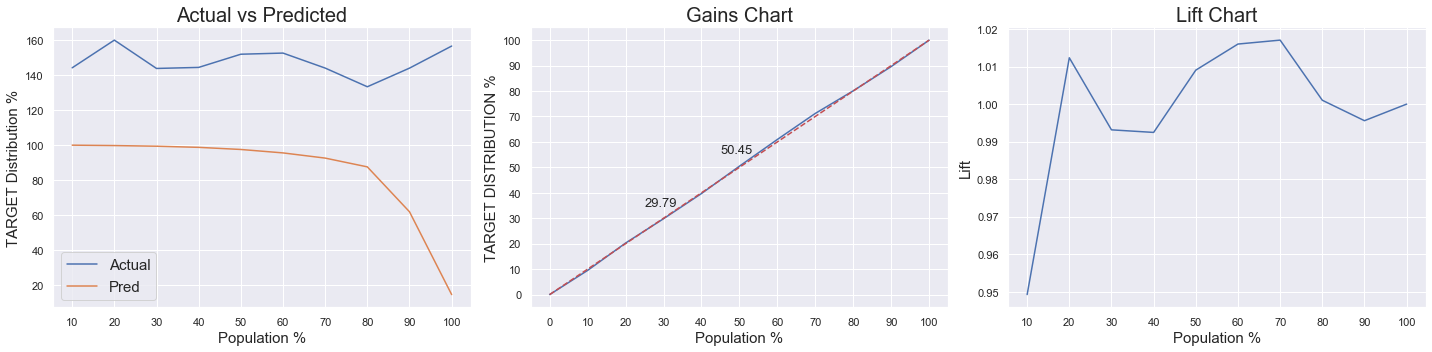

In [75]:
scores_train = scoring(X_train,RFHHc,Y_train)
lift_train = pd.concat([X_train,scores_train],axis=1)
gains(lift_train,['DECILE'],'TARGET','SCORE')
plt.show()

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: `item` has been deprecated and will be removed in a future version
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: `item` has been deprecated and will be removed in a future version
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: `item` has been deprecated and will be removed in a future version
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: `item` has been deprecated and will be removed in a future version


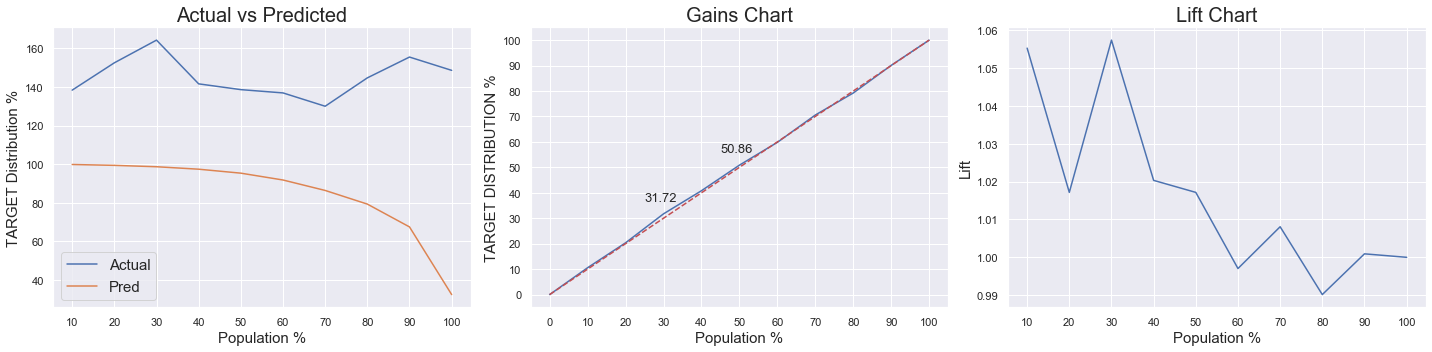

In [76]:
scores_test = scoring(X_test,RFHHc,Y_test)
lift_test = pd.concat([X_test,scores_test],axis=1)
gains(lift_test,['DECILE'],'TARGET','SCORE')

## Conclusion

While both Decision Tree and Random Forest score likely same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set. But Random Forest - Hyper parameter tuning might be robust for a little data change. We want to play safe in the end, so we choose the Ramdom Forest Hyperparameter.

In [77]:
Compile_date2 = dtz.datetime.now()
print('The last date we finished to compile this code at :',Compile_date2)

The last date we finished to compile this code at : 2019-10-11 09:35:06.192476


## Save Model for Future Use

In [78]:
from sklearn.externals import joblib

from collections import defaultdict
d = defaultdict(LabelEncoder)

filename = 'final_model.model'
i = [d,RFHHc]
joblib.dump(i,filename)

c:\program files\python36\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['final_model.model']

In [79]:
# to load data use :
# Use the code to load the model
#filename = 'final_model.model'

#d,clf=joblib.load(filename)